# Training single neuron

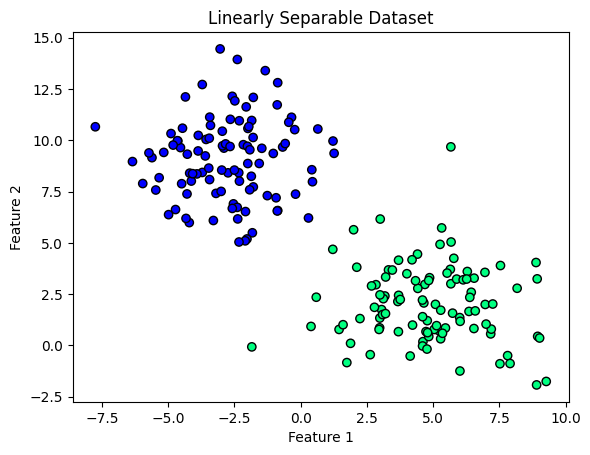

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

# Generate 2D data: 100 samples, 2 centers (classes)
X, y = make_blobs(n_samples=200, centers=2, random_state=42, cluster_std=2)

# Visualize the raw data
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='winter', edgecolors='k')
plt.title("Linearly Separable Dataset")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import layers,models
from tensorflow.keras import callbacks


In [ ]:
class Weights_History(callbacks.Callback):
    def on_train_begin(self, logs=None):
        self.weights_history = []

    def on_epoch_end(self, epoch, logs=None):
        weights = self.model.get_weights()
        self.weights_history.append(weights)
weight_tracker = Weights_History()

In [ ]:

# 1. Define the model
bolb_model = models.Sequential([
    layers.Dense(units=1, input_shape=(2,), activation='sigmoid')
])

# 2. Compile the model
bolb_model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

# 3. Summary of the network
bolb_model.summary()

# 4. Redulirizations
early_stops = callbacks.EarlyStopping( # stops when val_loss stops increaseing
    monitor='val_loss',
    patience=5,
    verbose=1
)
lr_reduce = callbacks.ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.3,
    patience=5,
    # min_lr=1e-6,
    verbose=1)

# 5. Train the model
bolb_model.fit(X_train, y_train,
          validation_split=0.2,
          epochs=100,
          callbacks=[early_stops, lr_reduce, weight_tracker],
          batch_size=8, )




/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_12"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_12 (Dense)                │ (None, 1)              │             3 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3 (12.00 B)

 Trainable params: 3 (12.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.8506 - loss: 0.3189 - val_accuracy: 0.9688 - val_loss: 0.1210 - learning_rate: 0.0010
Epoch 2/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9224 - loss: 0.1626 - val_accuracy: 0.9688 - val_loss: 0.1171 - learning_rate: 0.0010
Epoch 3/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9179 - loss: 0.2025 - val_accuracy: 0.9688 - val_loss: 0.1136 - learning_rate: 0.0010
Epoch 4/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8973 - loss: 0.2093 - val_accuracy: 0.9688 - val_loss: 0.1107 - learning_rate: 0.0010
Epoch 5/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9233 - loss: 0.1370 - val_accuracy: 0.9688 - val_loss: 0.1086 - learning_rate: 0.0010
Epoch 6/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9447 - loss: 0.1342 - val_accuracy: 0.9688 - val_loss: 0.1067 - learning_rate: 0.0010
Epoch 7/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9600 - loss: 0.1026 - val_ac

In [ ]:
losses = bolb_model.history.history['loss']

# losses

In [ ]:
w1_list = []
w2_list = []
b_list  = []

for w in weight_tracker.weights_history:
    w1_list.append(w[0][0][0])   # weight 1
    w2_list.append(w[0][1][0])   # weight 2
    b_list.append(w[1][0])       # bias
w1_list = np.array(w1_list)
w2_list = np.array(w2_list)
b_list = np.array(b_list)


25

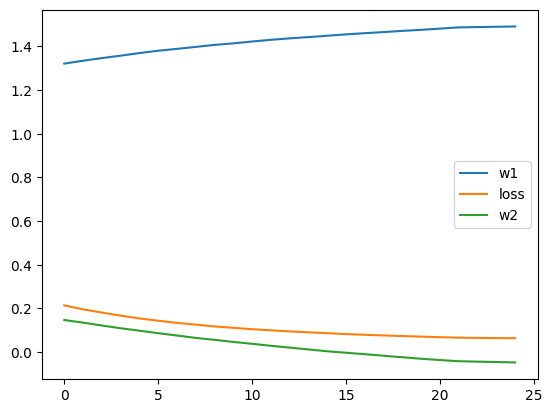

In [ ]:
# visualizing the weights
import matplotlib.pyplot as plt
x_ = np.arange(len(losses))

plt.subplot()
plt.plot(x_, w1_list, label='w1')
plt.plot(x_, losses, label='loss')
plt.plot(x_, w2_list, label='w2')
plt.legend()
plt.show()


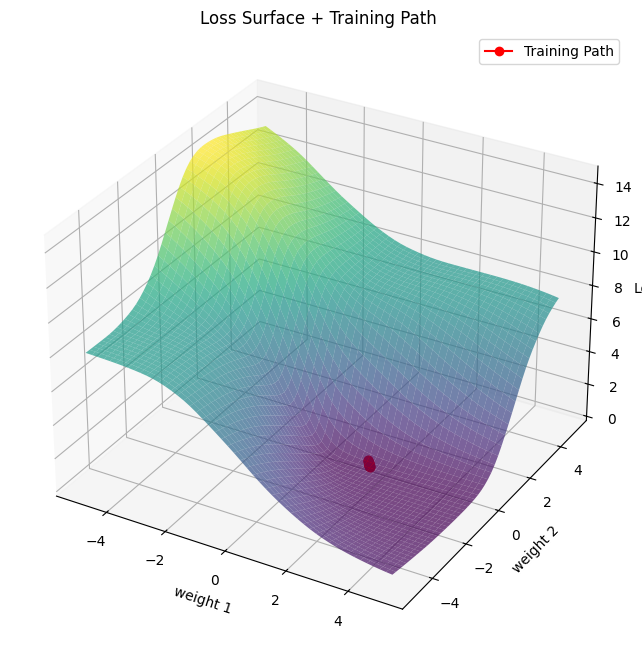

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Create a grid of weights
w1_vals = np.linspace(-5,5,50)
w2_vals = np.linspace(-5,5,50)
W1, W2 = np.meshgrid(w1_vals, w2_vals)
Z = np.zeros_like(W1)

b_fixed = 0.0  # fix bias for visualization

def logistic_loss(X, y, w1, w2, b):
    z = w1*X[:,0] + w2*X[:,1] + b
    y_hat = 1/(1+np.exp(-z))
    eps = 1e-7
    return -np.mean(y*np.log(y_hat+eps) + (1-y)*np.log(1-y_hat+eps))

# compute loss at each grid point
for i in range(W1.shape[0]):
    for j in range(W1.shape[1]):
        Z[i,j] = logistic_loss(X_train, y_train, W1[i,j], W2[i,j], b_fixed)

# plot
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111, projection='3d')

# surface
ax.plot_surface(W1, W2, Z, alpha=0.7, cmap='viridis')

# path
ax.plot(w1_list, w2_list, losses, color='red', marker='o', label='Training Path')

ax.set_xlabel('weight 1')
ax.set_ylabel('weight 2')
ax.set_zlabel('Loss')
ax.set_title('Loss Surface + Training Path')
ax.legend()
plt.show()


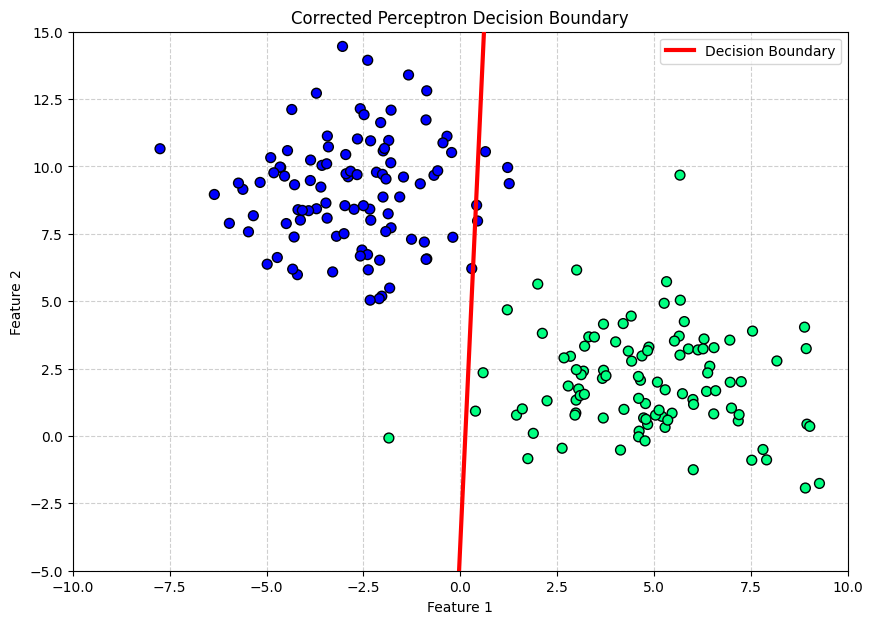

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# 1. Extract weights
weights, bias = bolb_model.layers[0].get_weights()
w1, w2 = weights[0][0], weights[1][0]
b = bias[0]

# 2. Set up the plot axes based on your actual data range
x1_min, x1_max = -10, 10
x2_min, x2_max = -5, 15  # This keeps the clusters "zoomed in"

x1_vals = np.linspace(x1_min, x1_max, 100)
# Calculate boundary: x2 = -(w1/w2)x1 - (b/w2)
x2_vals = -(w1 / w2) * x1_vals - (b / w2)

plt.figure(figsize=(10, 7))

# 3. Plot the data points first
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='winter', edgecolors='k', s=50, zorder=3)

# 4. Plot the decision boundary
plt.plot(x1_vals, x2_vals, color='red', lw=3, label='Decision Boundary', zorder=4)

# 5. CRITICAL: Limit the view so the line doesn't squash the data
plt.xlim(x1_min, x1_max)
plt.ylim(x2_min, x2_max)

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Corrected Perceptron Decision Boundary')
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
plt.show()

In [ ]:
import numpy as np

eve_model = bolb_model.evaluate(X_test, y_test)


pred = bolb_model.predict(X_test)
print('before armax: ', np.array(pred).flatten())
pred = (pred>0.5).astype(int)
print("Predicted:", np.array(pred).flatten())
print('Acctual : ',y_test)

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

conf_matrics = confusion_matrix(y_test, pred)
print('Confusion Metrics')
print(conf_matrics)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.9292 - loss: 0.1711
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
before armax:  [5.8348477e-01 9.2450678e-01 8.1959143e-02 1.6396424e-03 1.0409197e-02
 9.8667711e-01 7.1553297e-02 9.9639440e-01 2.5892089e-04 9.6796119e-01
 3.5380334e-02 3.3295907e-02 7.4499594e-03 1.6750282e-01 2.1165583e-01
 9.9998182e-01 9.4425172e-02 9.9465978e-01 9.9978322e-01 1.4623472e-03
 4.7600763e-03 9.9844438e-01 1.3504740e-02 1.4065205e-01 7.4982987e-04
 9.9377066e-01 9.9075103e-01 9.9959308e-01 9.9936128e-01 9.9996424e-01
 9.9971801e-01 9.8907501e-01 9.6156818e-01 6.6833101e-02 4.8994556e-01
 3.3244432e-03 9.9674416e-01 8.0359632e-01 9.0041999e-03 8.5942501e-01]
Predicted: [1 1 0 0 0 1 0 1 0 1 0 0 0 0 0 1 0 1 1 0 0 1 0 0 0 1 1 1 1 1 1 1 1 0 0 0 1
 1 0 1]
Acctual :  [0 0 0 0 0 1 0 1 0 1 0 0 0 0 0 1 0 1 1 0 0 1 0 0 0 1 1 1 1 1 1 1 1 0 0 0 1
 1 0 0]
Confusion Metrics
[[20  3]
 [ 0 17]]


In [ ]:
bolb_model.evaluate(X_test, y_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step - accuracy: 1.0000 - loss: 0.4623


[0.46234846115112305, 1.0]

In [ ]:
# visualizing the adma otimizer, loss reduction surface plot

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

weights = bolb_model.get_weights()

weights '''[array([[-0.8104364],
        [ 0.6422766]], dtype=float32),
 array([-0.00822259], dtype=float32),
 array([[-0.46143484,  0.53573525]], dtype=float32),
 array([ 0.        , -0.01051499], dtype=float32),
 array([[-0.7233121],
        [-0.9407585]], dtype=float32),
 array([0.10102522], dtype=float32)]'''






[array([[-0.8104364],
        [ 0.6422766]], dtype=float32),
 array([-0.00822259], dtype=float32),
 array([[-0.46143484,  0.53573525]], dtype=float32),
 array([ 0.        , -0.01051499], dtype=float32),
 array([[-0.7233121],
        [-0.9407585]], dtype=float32),
 array([0.10102522], dtype=float32)]

## House preice prediction using Neural network

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("harishkumardatalab/housing-price-prediction")

print("Path to dataset files:", path)

100%|██████████| 4.63k/4.63k [00:00<00:00, 7.65MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/harishkumardatalab/housing-price-prediction/versions/1


In [ ]:
import os
import pandas as pd

os.listdir(path)

full_path = os.path.join(path, 'Housing.csv')

df = pd.read_csv(full_path)



In [ ]:
df.head()


price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0  13300000  7420         4          2        3      yes        no       no   
1  12250000  8960         4          4        4      yes        no       no   
2  12250000  9960         3          2        2      yes        no      yes   
3  12215000  7500         4          2        2      yes        no      yes   
4  11410000  7420         4          1        2      yes       yes      yes   

  hotwaterheating airconditioning  parking prefarea furnishingstatus  
0              no             yes        2      yes        furnished  
1              no             yes        3       no        furnished  
2              no              no        2      yes   semi-furnished  
3              no             yes        3      yes        furnished  
4              no             yes        2       no        furnished

In [ ]:
print('Describition of The Data: \n', df.describe())
print('Info of the Data: \n', df.info())
print('\n ✔👀Check for the null value')
print(df.isnull().sum())


Describition of The Data: 
               price          area    bedrooms   bathrooms     stories  \
count  5.450000e+02    545.000000  545.000000  545.000000  545.000000   
mean   4.766729e+06   5150.541284    2.965138    1.286239    1.805505   
std    1.870440e+06   2170.141023    0.738064    0.502470    0.867492   
min    1.750000e+06   1650.000000    1.000000    1.000000    1.000000   
25%    3.430000e+06   3600.000000    2.000000    1.000000    1.000000   
50%    4.340000e+06   4600.000000    3.000000    1.000000    2.000000   
75%    5.740000e+06   6360.000000    3.000000    2.000000    2.000000   
max    1.330000e+07  16200.000000    6.000000    4.000000    4.000000   

          parking  
count  545.000000  
mean     0.693578  
std      0.861586  
min      0.000000  
25%      0.000000  
50%      0.000000  
75%      1.000000  
max      3.000000  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Nu

In [ ]:
X = df.drop(columns=['price'])
target = df['price']

In [ ]:
X

area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0    7420         4          2        3      yes        no       no   
1    8960         4          4        4      yes        no       no   
2    9960         3          2        2      yes        no      yes   
3    7500         4          2        2      yes        no      yes   
4    7420         4          1        2      yes       yes      yes   
..    ...       ...        ...      ...      ...       ...      ...   
540  3000         2          1        1      yes        no      yes   
541  2400         3          1        1       no        no       no   
542  3620         2          1        1      yes        no       no   
543  2910         3          1        1       no        no       no   
544  3850         3          1        2      yes        no       no   

    hotwaterheating airconditioning  parking prefarea furnishingstatus  
0                no             yes        2      yes        furnished  
1                no             yes        3       no        furnished  
2                no              no        2      yes   semi-furnished  
3                no             yes        3      yes        furnished  
4                no             yes        2       no        furnished  
..              ...             ...      ...      ...              ...  
540              no              no        2       no      unfurnished  
541              no              no        0       no   semi-furnished  
542              no              no        0       no      unfurnished  
543              no              no        0       no        furnished  
544              no              no        0       no      unfurnished  

[545 rows x 12 columns]

In [ ]:
# identifing numerical and catagorical columns

num_columns = X.select_dtypes(include=['int64']).columns
cata_columns = X.select_dtypes(include=['object']).columns

print(num_columns)
print(cata_columns)

Index(['area', 'bedrooms', 'bathrooms', 'stories', 'parking'], dtype='object')
Index(['mainroad', 'guestroom', 'basement', 'hotwaterheating',
       'airconditioning', 'prefarea', 'furnishingstatus'],
      dtype='object')


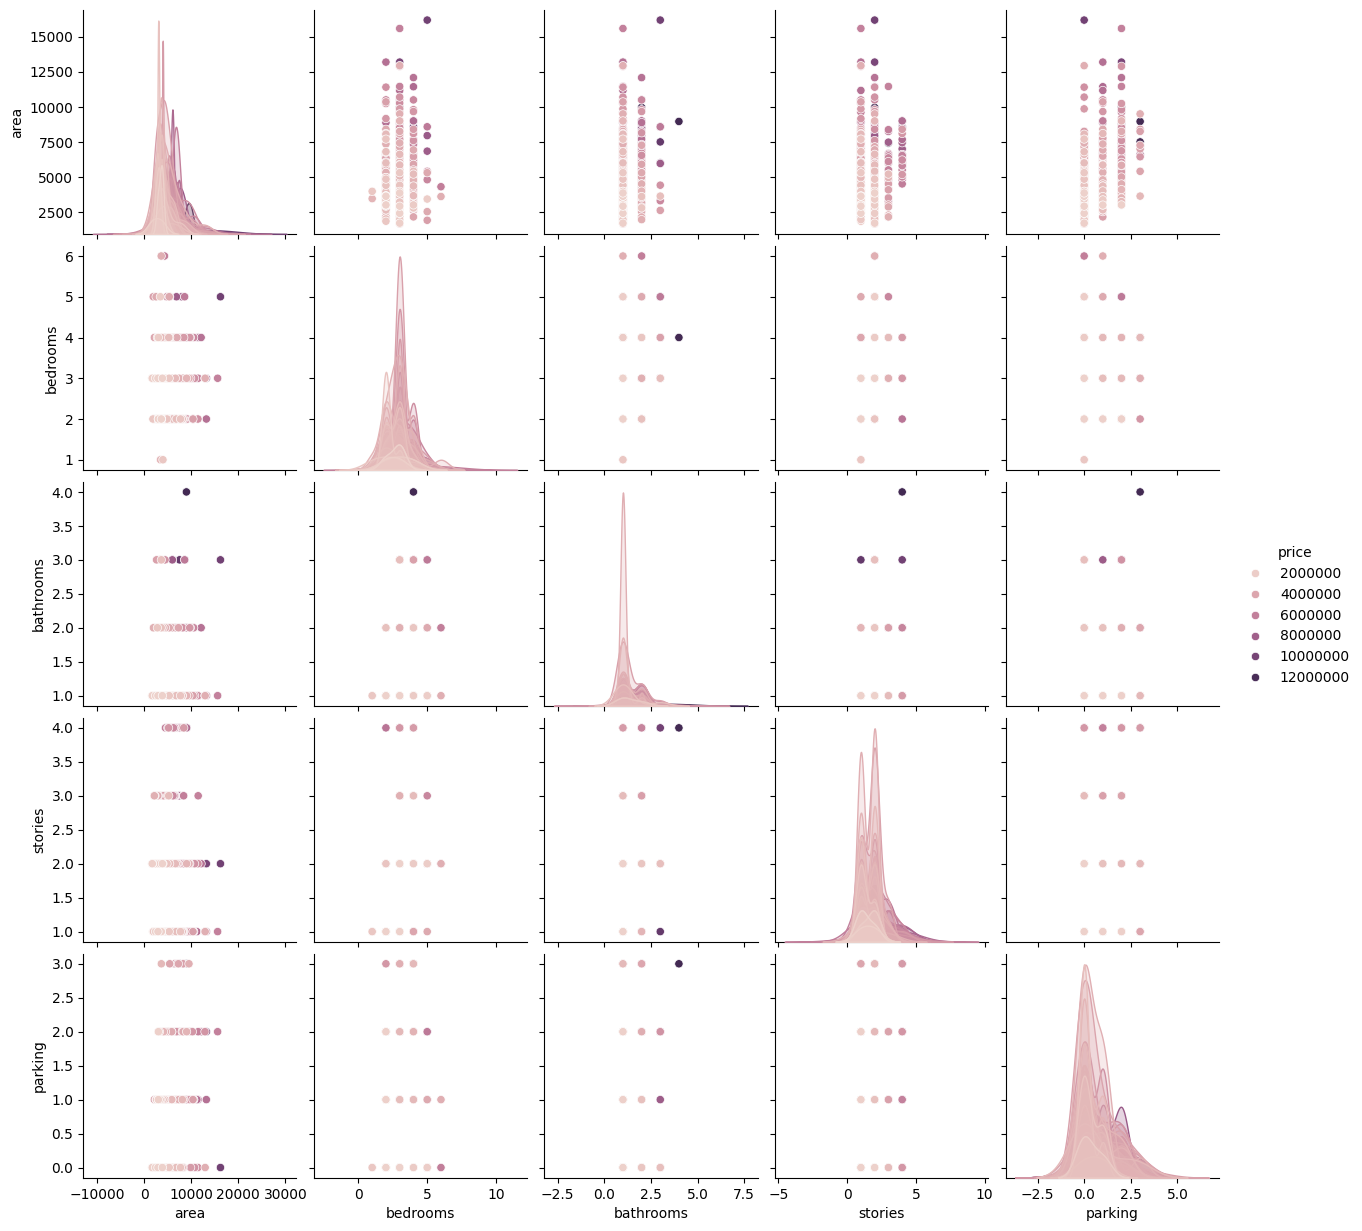

In [ ]:
import seaborn as sbn

sbn.pairplot(df, hue='price')
#

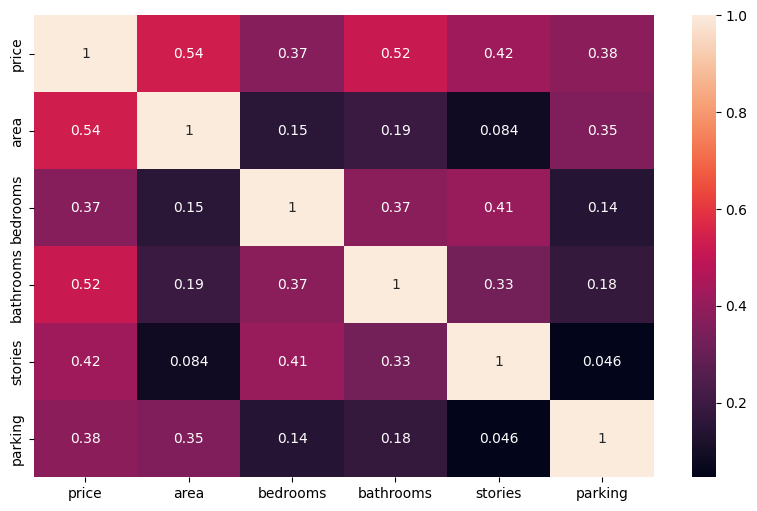

In [ ]:
numeric_data = df.select_dtypes(include=['number'])
plt.figure(figsize=(10, 6))
sbn.heatmap(numeric_data.corr(), annot=True)
plt.show()

# As from the plot above, the **Price** is more affect by 1) Area, 2)bathroom 3) stories ...

In [ ]:
# preprocessing pipline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

num_pipeline = Pipeline([
    ('scaler', StandardScaler())
])

cata_pipeline = Pipeline([
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

preprocesor = ColumnTransformer([
    ('num', num_pipeline, num_columns),
    ('cat', cata_pipeline, cata_columns)
])

In [ ]:
preprocesor

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('scaler', StandardScaler())]),
                                 Index(['area', 'bedrooms', 'bathrooms', 'stories', 'parking'], dtype='object')),
                                ('cat',
                                 Pipeline(steps=[('encoder',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 Index(['mainroad', 'guestroom', 'basement', 'hotwaterheating',
       'airconditioning', 'prefarea', 'furnishingstatus'],
      dtype='object'))])

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
                            X, target.values, test_size=0.2, random_state=42
                            )


In [ ]:
X_train_processed = preprocesor.fit_transform(X_train)
X_test_processed = preprocesor.transform(X_test)


X_train_processed[0]

array([0.38416819, 0.05527092, 1.53917323, 2.58764353, 0.36795665,
       0.        , 1.        , 1.        , 0.        , 1.        ,
       0.        , 1.        , 0.        , 0.        , 1.        ,
       1.        , 0.        , 1.        , 0.        , 0.        ])

In [ ]:
print(X_train_processed.shape)
print(X_test_processed.shape)

(436, 20)
(109, 20)


In [ ]:
y_test

array([ 4060000,  6650000,  3710000,  6440000,  2800000,  4900000,
        5250000,  4543000,  2450000,  3353000, 10150000,  2660000,
        3360000,  3360000,  2275000,  2660000,  2660000,  7350000,
        2940000,  2870000,  6720000,  5425000,  1890000,  5250000,
        4193000, 12250000,  3080000,  5110000,  9800000,  2520000,
        6790000,  3500000,  6650000,  2940000,  3325000,  4200000,
        4900000,  3290000,  3500000,  2380000,  5495000,  3675000,
        6650000,  4907000,  3150000,  4480000,  6580000,  5740000,
        3003000,  1820000,  8400000,  2450000,  4270000,  4007500,
        3234000,  1750000,  9800000,  2100000,  4340000,  3045000,
        3850000,  3500000,  4753000,  3080000,  4550000,  6510000,
        6685000,  5110000,  4550000,  6650000,  3640000,  5600000,
        3780000,  6615000,  3220000,  6650000,  4690000,  4830000,
        6860000,  2233000,  7035000,  4165000,  6195000,  6510000,
        1890000,  8190000,  2660000,  4193000, 13300000,  9681

In [ ]:
from sklearn.preprocessing import StandardScaler
import numpy as np
target_scaler = StandardScaler()

Y_train_scaled = target_scaler.fit_transform(np.array(y_train).reshape(-1, 1))
Y_test_scaled = target_scaler.transform(np.array(y_test).reshape(-1, 1))



In [ ]:
scaled = Y_test_scaled[:10]
print(scaled)
nornal = target_scaler.inverse_transform(scaled)
print(nornal)

[[-0.36819046]
 [ 1.10678695]
 [-0.56751173]
 [ 0.98719418]
 [-1.08574703]
 [ 0.11018059]
 [ 0.30950186]
 [-0.0931271 ]
 [-1.2850683 ]
 [-0.77081942]]
[[4060000.]
 [6650000.]
 [3710000.]
 [6440000.]
 [2800000.]
 [4900000.]
 [5250000.]
 [4543000.]
 [2450000.]
 [3353000.]]


In [ ]:
# input layers shape of the neurons

# shape of features with 1D->
X_train_processed.shape[1]

20

# Using Linear Regresion model


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
lin_reg = LinearRegression()

lin_reg.fit(X_train_processed, Y_train_scaled)
#
y_pred = lin_reg.predict(X_test_processed)

mse = mean_squared_error(Y_test_scaled, y_pred)
r2 = r2_score(Y_test_scaled, y_pred)

print('MSE: ', mse)
print('R2: ', r2)


MSE:  0.5689573276539988
R2:  0.6529242642153176


In [ ]:
X_train_processed.shape[1]

20

# Uisng Neural Network for tabular data

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras import Sequential

'''
input shape of train and test
(436, 20)
(109, 20)
'''
house_model = Sequential([
    layers.Input(shape=(X_train_processed.shape[1], )), # 20 inputs
    layers.Dense(50, activation='relu'),
    layers.Dense(10, activation='relu'),
    # layers.Dropout(0.2),
    layers.Dense(1, activation='linear')
])


house_model.summary()

#### BOOSTING THE PERFORMANCE
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

early_stoping = EarlyStopping(
    monitor='val_loss',
    patience=5,
    verbose=1
)
lr_reduce = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.3,
    patience=3,
    min_lr=1e-6,
    verbose=1
)
# compiling the model
house_model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss='mse',
    metrics=['r2_score', 'mae']
)

print("\n \n Training the Model✔✔✔✔✔")
# Fit, train the model
History = house_model.fit(
    X_train_processed,
    Y_train_scaled,
    epochs=100,
    batch_size=32,
    validation_split=0.2,
    callbacks=[early_stoping, lr_reduce]
)

Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_33 (Dense)                │ (None, 50)             │         1,050 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_34 (Dense)                │ (None, 10)             │           510 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_35 (Dense)                │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,571 (6.14 KB)

 Trainable params: 1,571 (6.14 KB)

 Non-trainable params: 0 (0.00 B)


 
 Training the Model✔✔✔✔✔
Epoch 1/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 3s 74ms/step - loss: 1.5043 - mae: 0.8799 - r2_score: -0.4722 - val_loss: 1.1872 - val_mae: 0.7899 - val_r2_score: -0.0763 - learning_rate: 0.0010
Epoch 2/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 1.0226 - mae: 0.7316 - r2_score: -0.0477 - val_loss: 0.9582 - val_mae: 0.7242 - val_r2_score: 0.1313 - learning_rate: 0.0010
Epoch 3/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.6296 - mae: 0.5879 - r2_score: 0.2573 - val_loss: 0.7549 - val_mae: 0.6318 - val_r2_score: 0.3156 - learning_rate: 0.0010
Epoch 4/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.5925 - mae: 0.5381 - r2_score: 0.4228 - val_loss: 0.6199 - val_mae: 0.5666 - val_r2_score: 0.4380 - learning_rate: 0.0010
Epoch 5/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.3409 - mae: 0.4314 - r2_score: 0.5664 - val_loss: 0.5499 - val_mae: 0.5319 - val_r2_score: 0.5015 - learning_rate: 0.0010
Epoch 6/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/st

In [ ]:
for key, value in History.history.items():
    if key == 'r2_score' or key == 'val_r2_score':
        print(key, ':', max(value))
    else:
        print(key, ':', min(value))

print("The gaps")
print('Loss Diff: ', min(History.history['loss']) - min(History.history['val_loss']))
print("R2 Diff: ", max(History.history['r2_score']) - max(History.history['val_r2_score']))

loss : 0.16719073057174683
mae : 0.29712802171707153
r2_score : 0.8282116651535034
val_loss : 0.41905641555786133
val_mae : 0.4567427337169647
val_r2_score : 0.6200970411300659
learning_rate : 0.0003000000142492354
The gaps
Loss Diff:  -0.2518656849861145
R2 Diff:  0.2081146240234375


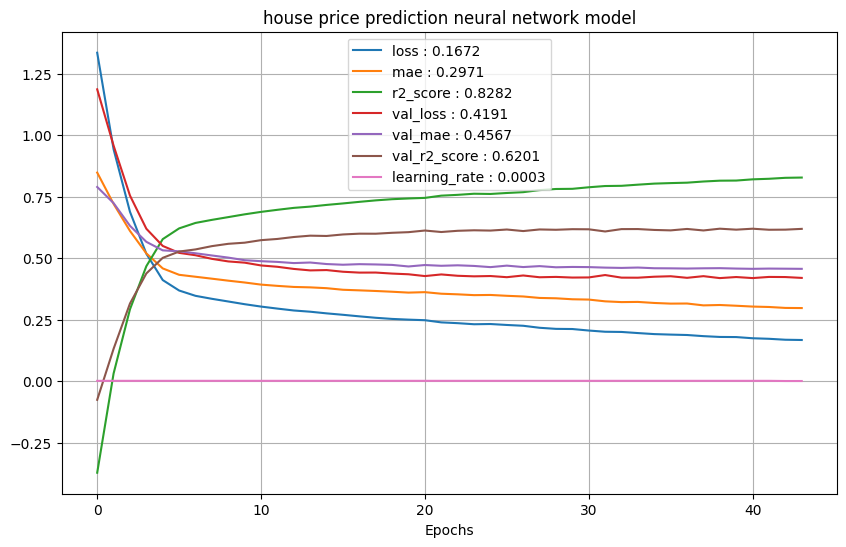

In [ ]:
# visualise the model

import matplotlib.pyplot as plt

def plot_loss(history):
    plt.figure(figsize=(10, 6))
    for key, value in history.history.items():
        if key == 'r2_score' or key == 'val_r2_score':
            plot_label = f'{key} : {round(max(value), 4)}'
        else:
            plot_label = f'{key} : {round(min(value), 4)}'
        plt.plot(value, label=plot_label)

    plt.title('house price prediction neural network model')
    plt.xlabel('Epochs')
    plt.grid(True)
    plt.legend()
    plt.show()
plot_loss(History)


In [ ]:
new_model_result = house_model.evaluate(X_test_processed, Y_test_scaled)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.6243 - mae: 0.5888 - r2_score: 0.6302 


# load_model	Load saved model
# save_model	Save model
#clone_model	Copy architecture

In [ ]:
saved_model = house_model.save('house_model.keras')


In [ ]:
loaded_model = tf.keras.models.load_model('house_model.keras')

In [ ]:
loaded_model.summary()

Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_27 (Dense)                │ (None, 50)             │         1,050 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_28 (Dense)                │ (None, 10)             │           510 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_29 (Dense)                │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,715 (18.42 KB)

 Trainable params: 1,571 (6.14 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 3,144 (12.29 KB)

#

# **Desease prediction** simple project

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("iamcaano/heart-disease-prediction-dataset")

print(path)

100%|██████████| 66.5k/66.5k [00:00<00:00, 49.4MB/s]

Extracting files...
/root/.cache/kagglehub/datasets/iamcaano/heart-disease-prediction-dataset/versions/1


#

In [ ]:
import os
import pandas as pd

os.listdir(path)

path1 = os.path.join(path, 'heart.csv')

df = pd.read_csv(path1)

df

age  sex   cp  trestbps   chol  fbs  restecg  thalach  exang  oldpeak  \
0     52.0  1.0  0.0     125.0  212.0  0.0      1.0    168.0    0.0      1.0   
1     53.0  1.0  0.0     140.0  203.0  1.0      0.0    155.0    1.0      3.1   
2     70.0  1.0  0.0     145.0  174.0  0.0      1.0    125.0    1.0      2.6   
3     61.0  1.0  0.0     148.0  203.0  0.0      1.0    161.0    0.0      0.0   
4     62.0  0.0  0.0     138.0  294.0  1.0      1.0    106.0    0.0      1.9   
...    ...  ...  ...       ...    ...  ...      ...      ...    ...      ...   
6020  54.0  0.0  2.0     123.0  282.0  0.0      0.0     99.0    1.0      2.2   
6021  44.0  1.0  1.0     130.0  219.0  0.0      0.0    188.0    0.0      0.0   
6022  54.0  0.0  0.0     180.0  325.0  0.0      2.0    118.0    1.0      3.6   
6023  57.0  1.0  2.0     152.0  132.0  1.0      1.0    177.0    0.0      0.1   
6024  52.0  1.0  0.0     112.0  230.0  0.0      1.0    160.0    0.0      0.0   

      slope   ca  thal  target  
0       2.0  2.0   3.0     0.0  
1       0.0  0.0   3.0     0.0  
2       0.0  0.0   3.0     0.0  
3       2.0  1.0   3.0     0.0  
4       1.0  3.0   2.0     0.0  
...     ...  ...   ...     ...  
6020    1.0  2.0   2.0     1.0  
6021    2.0  0.0   2.0     1.0  
6022    1.0  4.0   2.0     0.0  
6023    2.0  3.0   2.0     1.0  
6024    2.0  1.0   2.0     0.0  

[6025 rows x 14 columns]

In [ ]:
X = df.drop(columns=['target'])
y = df['target']

In [ ]:
print("Info of the data: \n", df.info())

print('The describtion of the data: \n', df.describe() )

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6025 entries, 0 to 6024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       6025 non-null   float64
 1   sex       6025 non-null   float64
 2   cp        6025 non-null   float64
 3   trestbps  6025 non-null   float64
 4   chol      6025 non-null   float64
 5   fbs       6025 non-null   float64
 6   restecg   6025 non-null   float64
 7   thalach   6025 non-null   float64
 8   exang     6025 non-null   float64
 9   oldpeak   6025 non-null   float64
 10  slope     6025 non-null   float64
 11  ca        6025 non-null   float64
 12  thal      6025 non-null   float64
 13  target    6025 non-null   float64
dtypes: float64(14)
memory usage: 659.1 KB
Info of the data: 
 None
The describtion of the data: 
                age          sex          cp     trestbps         chol  \
count  6025.000000  6025.000000  6025.00000  6025.000000  6025.000000   
mean     54.544066     0

In [ ]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

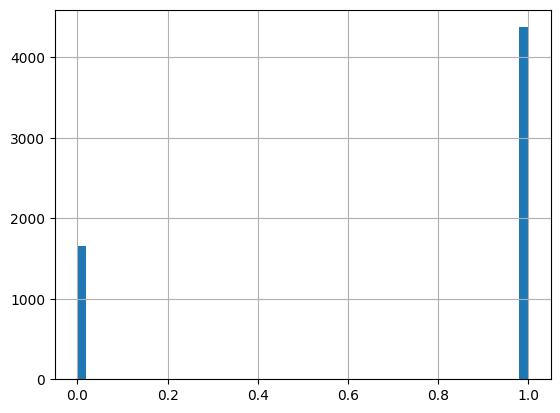

In [ ]:
import matplotlib.pyplot as plt

df['target'].hist(bins=50)
plt.show()


KeyboardInterrupt: 

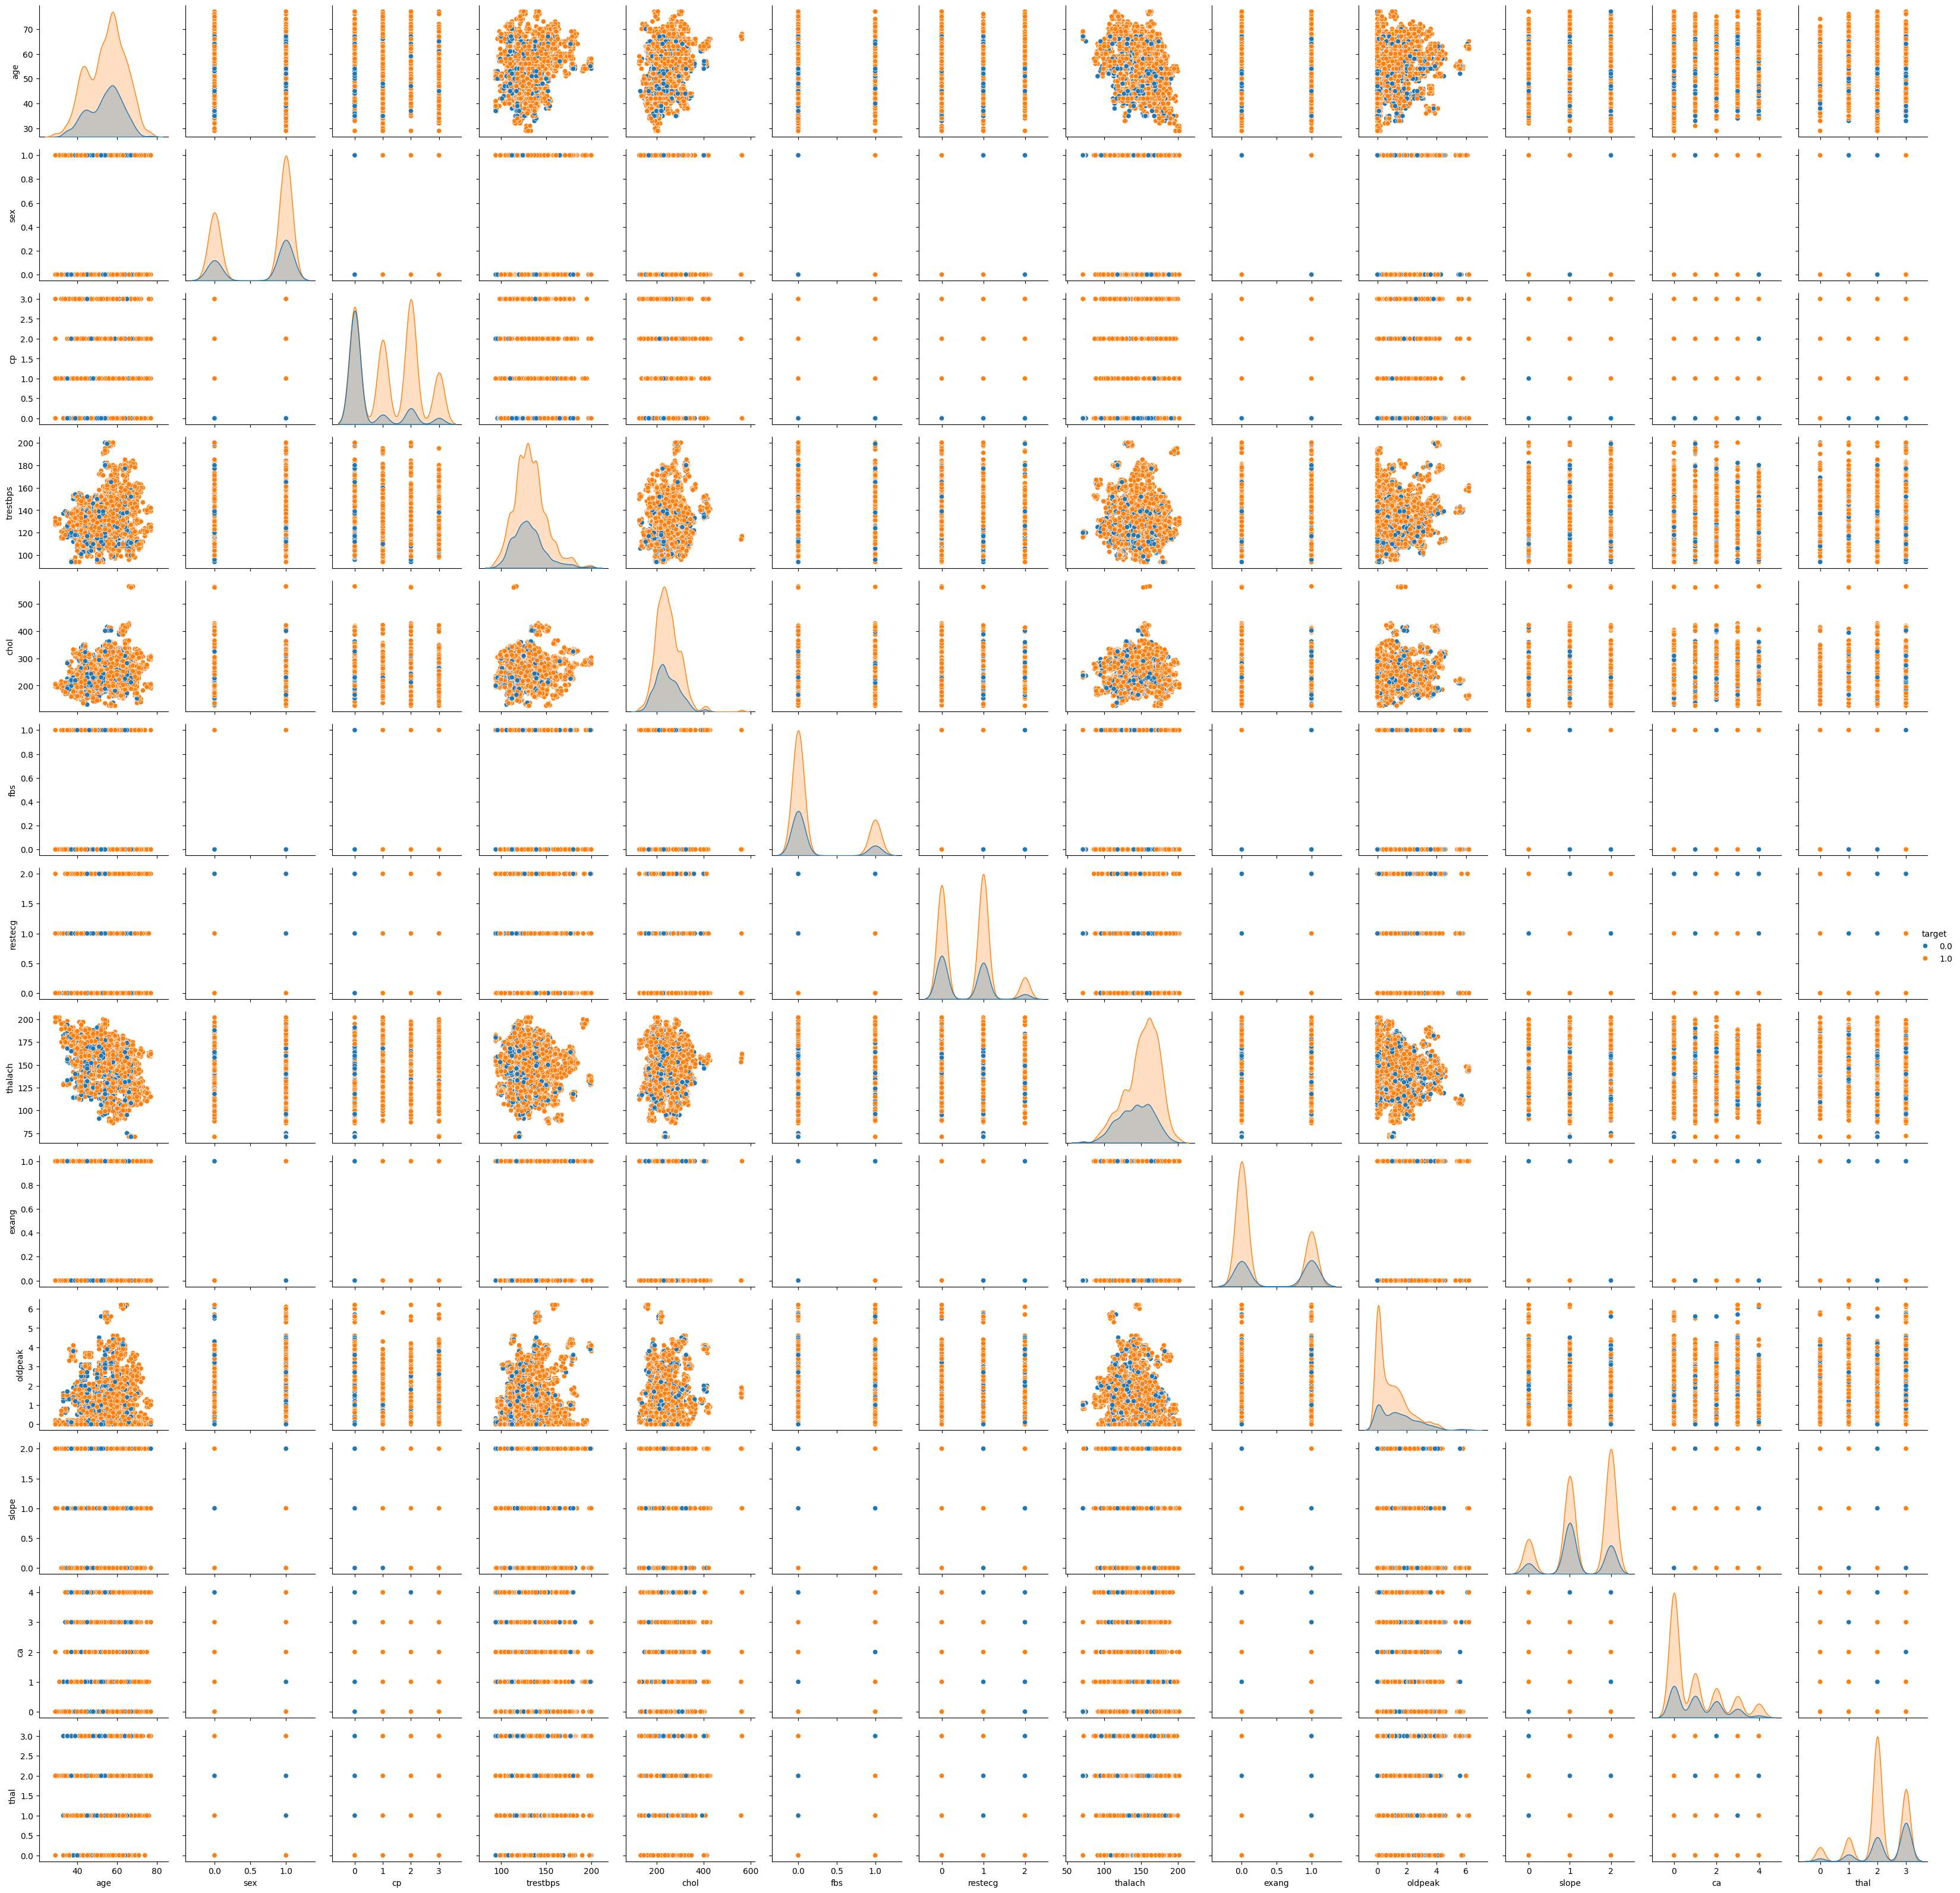

In [ ]:

import seaborn as sbn
sbn.pairplot(df, hue='target')
plt.show()

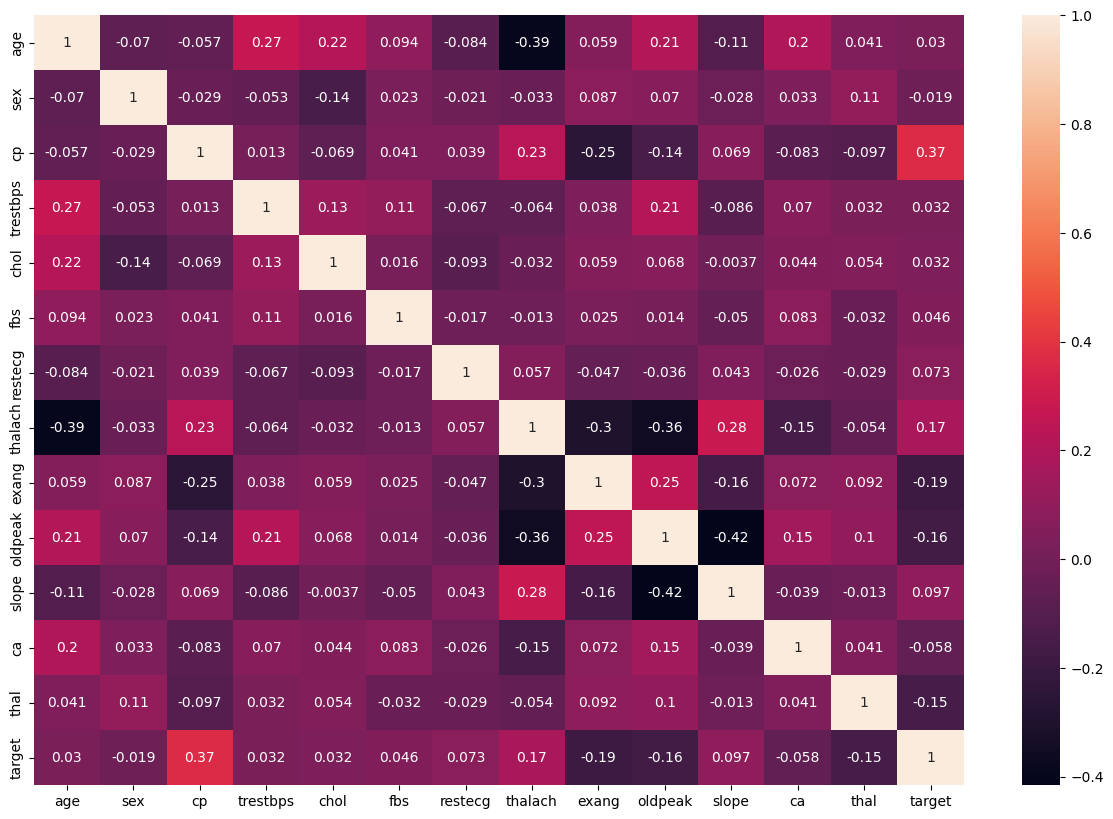

In [ ]:
plt.figure(figsize=(15, 10))
sbn.heatmap(df.corr(), annot=True)
plt.show()

In [ ]:
set(y)
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((4820, 13), (1205, 13), (4820,), (1205,))

In [ ]:
# preprocessing the data
from sklearn.preprocessing import StandardScaler, LabelEncoder
# from sklearn.pipeline import Pipeline
# from sklearn.compose import ColumnTransformer

label_encoder = LabelEncoder() # for the target variabel
y_train_procesed = label_encoder.fit_transform(y_train).reshape(-1, 1)
y_test_procesed = label_encoder.transform(y_test).reshape(-1, 1)

std_scaler = StandardScaler()
X_train_processed = std_scaler.fit_transform(X_train)
X_test_processed = std_scaler.transform(X_test)


In [ ]:

X_train_processed,
X_test_processed,
y_train_procesed,
y_test_procesed.shape

(1205, 1)

In [ ]:
X_train_processed.shape , X_test_processed.shape, y_train_procesed.shape, y_test_procesed.shape


((4820, 13), (1205, 13), (4820, 1), (1205, 1))

# Logestic model

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV

param_grid = {'C':[0.01, 0.1, 1,5,8, 10,20]}

grid = GridSearchCV(
    LogisticRegression(),
    param_grid,
    cv=5,
    scoring='accuracy'
)

grid.fit(X_train_processed, y_train_procesed)

test_pred = grid.predict(X_test_processed)
train_pred = grid.predict(X_train_processed)

train_accu = accuracy_score(y_train_procesed, train_pred)
test_accu = accuracy_score(y_test_procesed, test_pred)

prec = precision_score(y_test_procesed, test_pred)
recall = recall_score(y_test_procesed, test_pred)
f1 = f1_score(y_test_procesed, test_pred)

print('Train Accuracy: ', train_accu)
print('Test Accuracy: ', test_accu)
print('Precision: ', prec)
print('recall: ',recall)
print('f1: ', f1)

cm = confusion_matrix(y_test_procesed, test_pred)
print(cm)


class_report = classification_report(y_test_procesed, test_pred)
print(class_report)

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

Train Accuracy:  0.7678423236514523
Test Accuracy:  0.7742738589211619
Precision:  0.7962037962037962
recall:  0.9213872832369943
f1:  0.8542336548767417
[[136 204]
 [ 68 797]]
              precision    recall  f1-score   support

           0       0.67      0.40      0.50       340
           1       0.80      0.92      0.85       865

    accuracy                           0.77      1205
   macro avg       0.73      0.66      0.68      1205
weighted avg       0.76      0.77      0.75      1205



/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

In [ ]:
grid.best_params_

{'C': 0.1}

# Neural network model

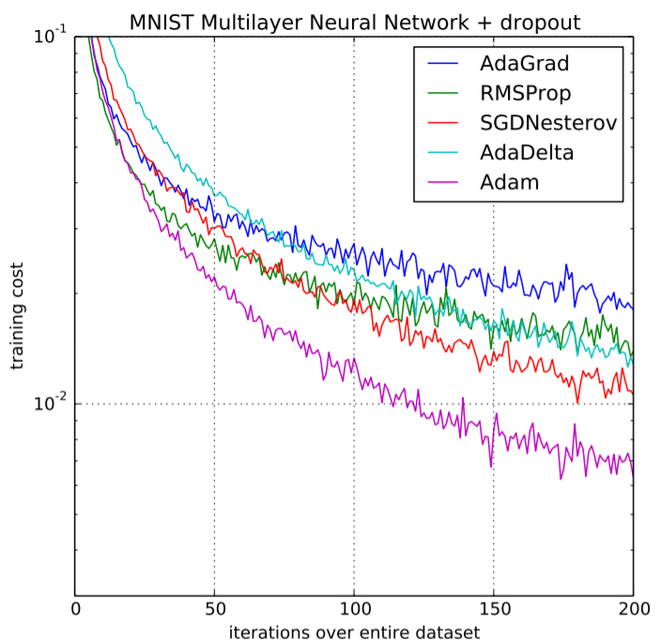

In [ ]:
X_train_processed.shape[1]

13

In [ ]:
import tensorflow

from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
import tensorflow.keras.callbacks as callbacks


In [ ]:
heart_model = Sequential([
    layers.Dense(32, activation='relu', input_shape=(X_train.shape[1],)),
    layers.Dense(16, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

# boosting
early_stoping = EarlyStopping(
    monitor='val_loss',
    patience=7,
    verbose=1
)
# Define the callback
reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',    # Metric to monitor
    factor=0.2,       # Factor to reduce the learning rate
    patience=7,       # Number of epochs with no improvement
    verbose=1,        # Print updates
    min_lr=0.001      # Minimum learning rate
)
# compile the model
heart_model.compile(
    optimizer=tensorflow.keras.optimizers.Adam(learning_rate=0.01),
    loss = 'binary_crossentropy',
    metrics=['accuracy']
)


History = heart_model.fit(
    X_train_processed, y_train_procesed,
    epochs=100,
    batch_size=32,
    # validation_split=0.2,
    validation_data=(X_test_processed, y_test_procesed),
    callbacks=[early_stoping, reduce_lr]
)



Epoch 1/100
151/151 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.7061 - loss: 0.5519 - val_accuracy: 0.7801 - val_loss: 0.4607 - learning_rate: 0.0100
Epoch 2/100
151/151 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7820 - loss: 0.4576 - val_accuracy: 0.7934 - val_loss: 0.4354 - learning_rate: 0.0100
Epoch 3/100
151/151 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7901 - loss: 0.4186 - val_accuracy: 0.7784 - val_loss: 0.4366 - learning_rate: 0.0100
Epoch 4/100
151/151 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7920 - loss: 0.4174 - val_accuracy: 0.7892 - val_loss: 0.4170 - learning_rate: 0.0100
Epoch 5/100
151/151 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7969 - loss: 0.3967 - val_accuracy: 0.7759 - val_loss: 0.4238 - learning_rate: 0.0100
Epoch 6/100
151/151 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7917 - loss: 0.3885 - val_accuracy: 0.7776 - val_loss: 0.4270 - learning_rate: 0.0100
Epoch 7/100
151/151 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8037 - loss: 0.

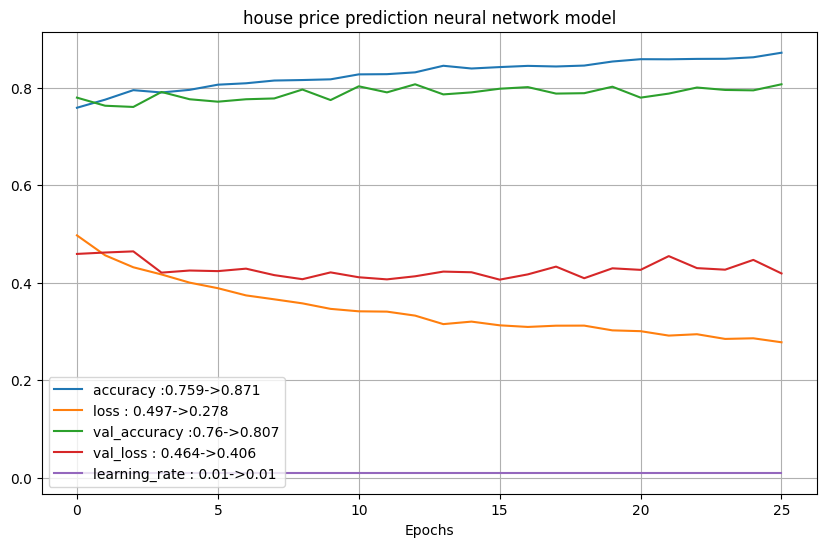

In [ ]:
# visualise the model

import matplotlib.pyplot as plt

def plot_loss(history):
    plt.figure(figsize=(10, 6))
    for key, value in history.history.items():
        if key == 'accuracy' or key == 'val_accuracy':
            plot_label = f'{key} :{round(min(value), 3)}->{round(max(value), 3)}'
        else:
            plot_label = f'{key} : {round(max(value), 3)}->{round(min(value), 3)}'
        plt.plot(value, label=plot_label)

    plt.title('house price prediction neural network model')
    plt.xlabel('Epochs')
    plt.grid(True)
    plt.legend()
    plt.show()
plot_loss(History)


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

train_nn_pred = heart_model.predict(X_train_processed)
test_nn_pred = heart_model.predict(X_test_processed)


confusion_matrix = confusion_matrix(y_test_procesed, test_nn_pred.round())
print(confusion_matrix)

class_report = classification_report(y_test_procesed, test_nn_pred.round())
print(class_report)


151/151 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
[[241  99]
 [135 730]]
              precision    recall  f1-score   support

           0       0.64      0.71      0.67       340
           1       0.88      0.84      0.86       865

    accuracy                           0.81      1205
   macro avg       0.76      0.78      0.77      1205
weighted avg       0.81      0.81      0.81      1205



# best

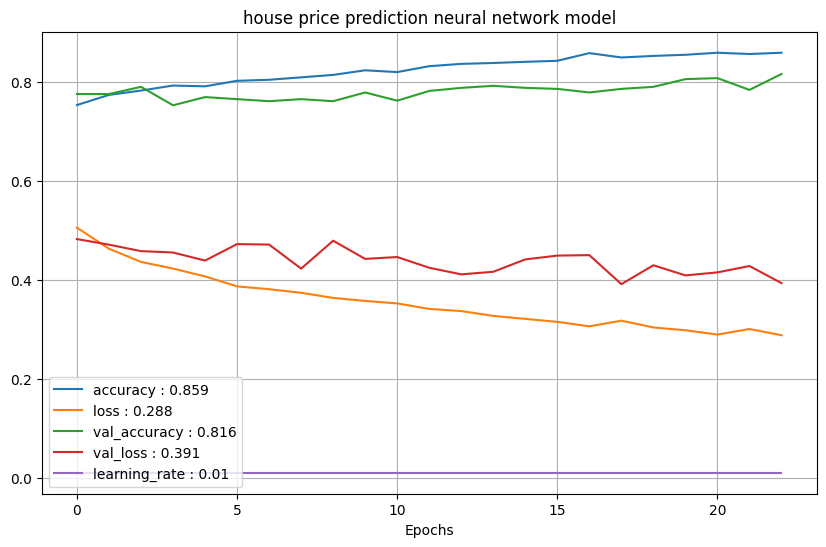

In [ ]:
# visualise the model

import matplotlib.pyplot as plt

def plot_loss(history):
    plt.figure(figsize=(10, 6))
    for key, value in history.history.items():
        if key == 'accuracy' or key == 'val_accuracy':
            plot_label = f'{key} : {round(max(value), 3)}'
        else:
            plot_label = f'{key} : {round(min(value), 3)}'
        plt.plot(value, label=plot_label)

    plt.title('house price prediction neural network model')
    plt.xlabel('Epochs')
    plt.grid(True)
    plt.legend()
    plt.show()
plot_loss(History)


# neural network Archtecture for MNIST datasets without CNN

In [ ]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split

digits = load_digits()
X = digits.data
y = digits.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


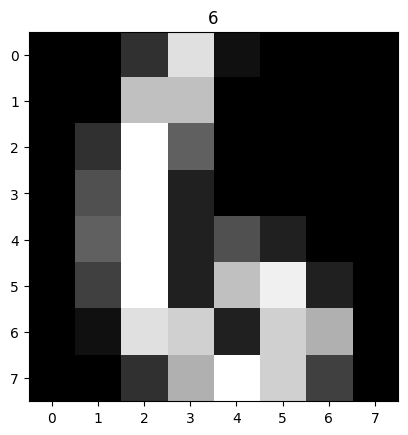

In [ ]:
x = X_train[0]
x.shape # (64, )

x = x.reshape(8, 8)
x.shape # (8, 8)

import matplotlib.pyplot as plt
plt.imshow(x, cmap='gray', )
plt.title(label=y_train[0])
plt.show()

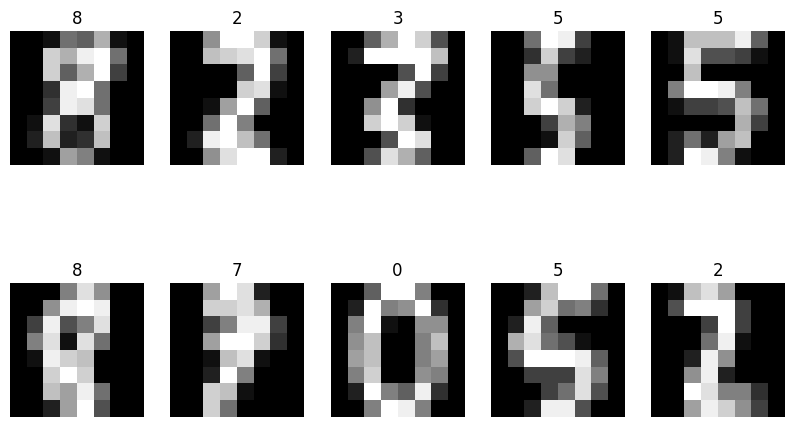

In [ ]:
# visualizing 10 random images
index = np.random.randint(0, X_train.shape[0], 10)
plt.figure(figsize=(10, 6))
for i, idx in enumerate(index):
    img = X_train[idx].reshape(8, 8)
    plt.subplot(2, 5, i+1)
    plt.imshow(img, cmap='gray')
    plt.title(y_train[idx])
    plt.axis('off')
plt.show()


In [ ]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt


from tensorflow.keras import layers, Sequential
from tensorflow.keras import callbacks
from tensorflow.keras import optimizers
from tensorflow.keras import regularizers

# from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau



In [ ]:

digit_model = Sequential([
    layers.Dense(32, activation='relu', input_shape=(X_train.shape[1],)),
    layers.Dense(16, activation='relu', ),#kernel_regularizer=regularizers.l2(0.01)
    layers.Dense(10, activation='softmax')
])

digit_model.compile(
    optimizer=optimizers.Adam(learning_rate=0.01),
    loss = 'sparse_categorical_crossentropy',
    metrics=['accuracy']
)


# 4. Redulirizations
early_stops = callbacks.EarlyStopping( # stops when val_loss stops increaseing
    monitor='val_loss',
    patience=5,
    verbose=1
)
lr_reduce = callbacks.ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.3,
    patience=5,
    # min_lr=1e-6,
    verbose=1)

History = digit_model.fit(
    X_train, y_train,
    epochs=100,
    batch_size=32,
    validation_split=0.2,
    callbacks = [early_stops, lr_reduce]
)


Epoch 1/100


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.2557 - loss: 2.6423 - val_accuracy: 0.6250 - val_loss: 1.0716 - learning_rate: 0.0100
Epoch 2/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7220 - loss: 0.7925 - val_accuracy: 0.7674 - val_loss: 0.6575 - learning_rate: 0.0100
Epoch 3/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8568 - loss: 0.4674 - val_accuracy: 0.8403 - val_loss: 0.4704 - learning_rate: 0.0100
Epoch 4/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9147 - loss: 0.2870 - val_accuracy: 0.8750 - val_loss: 0.3701 - learning_rate: 0.0100
Epoch 5/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9603 - loss: 0.1639 - val_accuracy: 0.8924 - val_loss: 0.3050 - learning_rate: 0.0100
Epoch 6/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9554 - loss: 0.1524 - val_accuracy: 0.8819 - val_loss: 0.3739 - learning_rate: 0.0100
Epoch 7/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9343 - loss: 0.1640 - val_accuracy: 0.923

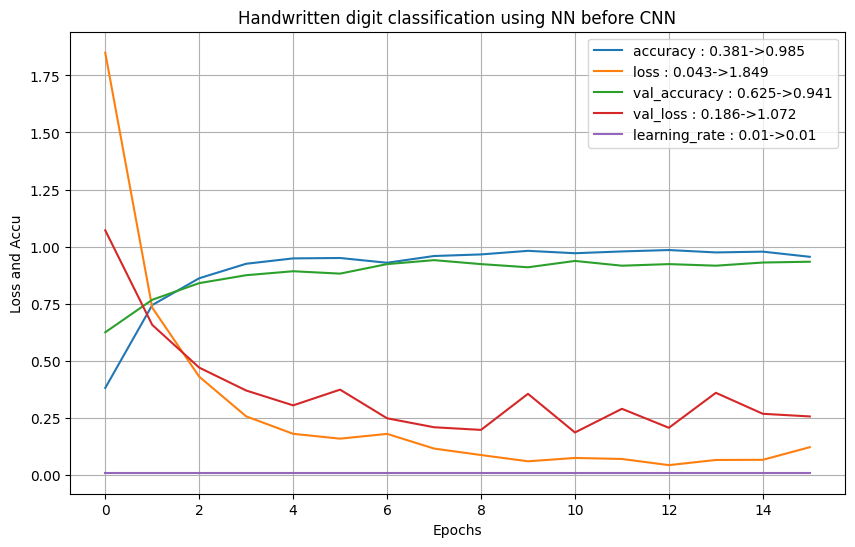

In [ ]:


def plot_history(history):
    plt.figure(figsize=(10, 6))
    for key, value in history.history.items():
        plot_lable = f'{key} : {round(min(value), 3)}->{round(max(value), 3)}'
        plt.plot(value, label =plot_lable)
    plt.title('Handwritten digit classification using NN before CNN')
    plt.xlabel('Epochs')
    plt.ylabel('Loss and Accu')
    plt.legend()
    plt.grid(True)
    plt.show()

plot_history(History)

In [ ]:
# evaluate the model

evalu_model = digit_model.evaluate(X_test, y_test)
pred_tests = digit_model.predict(X_test)  # check the performance of the model
pred_tests = np.argmax(pred_tests, axis=1) # predict the label of the test data

print('Model Evaluation')
print(evalu_model)

# predicte
print("Model Prediction")
print(pred_tests)

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9576 - loss: 0.2062 
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
Model Evaluation
[0.21292544901371002, 0.9527778029441833]
Model Prediction
[6 9 3 7 2 1 5 2 5 2 3 9 4 0 4 2 3 7 8 8 4 3 9 7 5 6 3 5 6 3 4 9 2 4 4 6 9
 4 7 6 6 9 1 3 6 1 3 0 6 5 5 1 3 5 6 0 9 0 0 1 0 4 5 2 4 5 7 0 7 5 9 9 5 4
 7 0 4 5 5 9 9 0 2 3 8 0 6 4 4 9 1 2 8 3 5 2 9 4 4 4 4 3 5 3 1 3 5 9 4 2 7
 7 4 4 1 9 2 7 8 7 2 6 9 4 0 7 2 7 5 8 7 5 7 5 0 6 6 4 2 8 0 9 4 6 9 9 6 9
 0 5 5 6 6 0 6 4 3 9 3 8 7 2 9 0 4 5 3 6 5 9 9 8 4 2 1 3 7 7 2 2 3 9 8 0 3
 2 2 5 6 9 9 4 1 5 4 2 3 6 4 8 5 9 5 7 8 9 4 8 1 5 4 4 9 6 1 8 6 0 4 5 2 7
 4 6 4 5 6 0 3 2 3 6 7 1 5 1 4 7 6 9 2 5 5 1 0 2 8 8 9 9 7 6 2 2 2 3 4 8 8
 3 6 0 3 7 7 0 1 0 4 5 1 5 3 6 0 4 1 0 0 3 6 5 9 7 3 5 5 9 9 4 5 3 3 2 0 5
 8 3 4 0 2 4 6 4 3 4 5 0 5 2 1 3 1 4 1 1 7 0 1 5 2 1 2 8 7 0 6 4 8 1 5 1 8
 4 5 8 7 9 8 8 0 6 2 0 7 9 1 9 5 2 7 7 4 8 7 4 3 8 3 5]


(64,)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


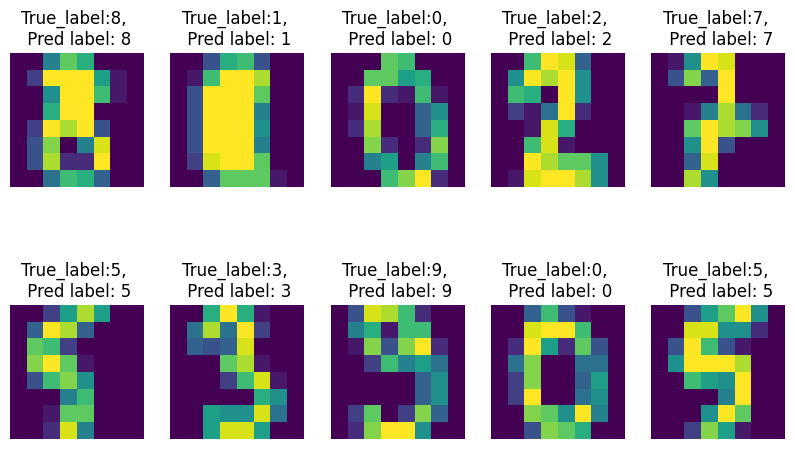

In [ ]:
# 10 test image and there predicted label

random_imgs_idx = np.random.randint(0, X_test.shape[0], 10)
random_imgs_idx

imgs = X_test[random_imgs_idx]
print(imgs[0].shape)
true_labels = y_test[random_imgs_idx]

pred_probablity = digit_model.predict(imgs)

pred_labels = np.argmax(pred_probablity, axis=1)

plt.figure(figsize=(10, 6))


for i, (label, img) in enumerate(zip(pred_labels, imgs)):
    img = img.reshape(8, 8)
    plt.subplot(2, 5, i+1)
    plt.imshow(img)
    plt.title(f'True_label:{true_labels[i]}, \n Pred label: {label}')
    plt.axis('off')
plt.show()


## The model is like perfect, yes!!!

# Next Intermidate peoject using simple Neural network

If you’re looking for Chest X-ray datasets on Kaggle, one of the most popular and widely used is the Chest X-Ray Images (Pneumonia) dataset by Paul Mooney.
Here are some key details:

1. Chest X-Ray Images (Pneumonia)

Link: Kaggle Dataset
Description:
Contains 5,863 chest X-ray images (JPEG) divided into:

PNEUMONIA
NORMAL


Source: Collected from retrospective cohorts of pediatric patients (1–5 years old).
Structure:chest_xray/
    train/
        NORMAL/
        PNEUMONIA/
    val/
        NORMAL/
        PNEUMONIA/
    test/
        NORMAL/
        PNEUMONIA/


Use case: Pneumonia detection using deep learning (CNNs, transfer learning, etc.).


2. NIH Chest X-ray Dataset

Link: NIH Chest X-ray Dataset on Kaggle
Description:
Over 100,000 frontal-view X-ray images with 14 disease labels (multi-label classification).
Diseases include: Pneumonia, Cardiomegaly, Effusion, Infiltration, Mass, Nodule, etc.
Use case: Multi-label medical image classification.


3. COVID-19 Radiography Database

Link: COVID-19 Radiography Database
Description:
Contains COVID-19, Viral Pneumonia, Lung Opacity, and Normal chest X-ray images.
Use case: COVID-19 and pneumonia detection.


✅ Tip: To download Kaggle datasets programmatically, you can use:
Bashpip install kaggle
kaggle datasets download -d paultimothymooney/chest-xray-pneumonia
unzip chest-xray-pneumonia.zip

(Make sure you have your Kaggle API key set up in ~/.kaggle/kaggle.json)

If you want, I can prepare a ready-to-run Python script that loads the Kaggle chest X-ray dataset and trains a CNN for pneumonia detection.
Do you want me to create that?


# **Chest X-Ray** Images (Pneumonia)
5,863 images, 2 categories

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("paultimothymooney/chest-xray-pneumonia")

print("Path to dataset files:", path)

Using Colab cache for faster access to the 'chest-xray-pneumonia' dataset.
Path to dataset files: /kaggle/input/chest-xray-pneumonia


## Extracting images and labels

In [ ]:
import os

os.listdir(path)
path1 = os.path.join(path, 'chest_xray')

os.listdir(path1)# ['val', 'test', 'train']

def extract_imgs(cata,path):
    norm_list = []
    norm_label = []

    pneum_list = []
    pneum_label = []

    cata_list = []
    cata_label = []

    cata_path = os.path.join(path1, cata)
    fetal_cata = ['PNEUMONIA', 'NORMAL']
    pneu_path = os.path.join(cata_path, 'PNEUMONIA')
    norm_path = os.path.join(cata_path, 'NORMAL')
    for label in os.listdir(pneu_path):
        full_pneu_path = os.path.join(pneu_path, label)
        pneum_list.append(full_pneu_path)
        pneum_label.append('pneumonia')
    for img in os.listdir(norm_path):
        full_norm_path = os.path.join(norm_path, img)
        norm_list.append(full_norm_path)
        norm_label.append('normal')


    cata_list.extend(norm_list)
    cata_list.extend(pneum_list)

    cata_label.extend(norm_label)
    cata_label.extend(pneum_label)

    return np.array(cata_list), np.array(cata_label)

X_train, y_train = extract_imgs('train', path1)
X_test, y_test = extract_imgs('test', path1)
X_val, y_val = extract_imgs('val', path1)


In [ ]:
len(X_train), len(y_train), len(X_test), len(y_test), len(X_val), len(y_val)

(5216, 5216, 624, 624, 16, 16)

(np.float64(-0.5), np.float64(1087.5), np.float64(727.5), np.float64(-0.5))

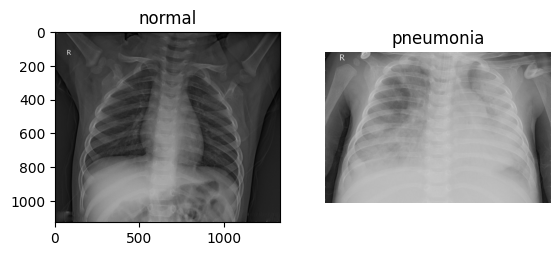

In [ ]:
import cv2
import matplotlib.pyplot as plt

p = X_train[0]
p2 = X_train[-1]
img = cv2.imread(p)
img2 = cv2.imread(p2)
plt.subplot(1,2,1)
plt.imshow(img)
plt.title(y_train[0])

plt.subplot(1,2,2)
plt.imshow(img2)
plt.title(y_train[-1])

plt.axis('off')

# Visualizing 10 normal and pneumonial chust image

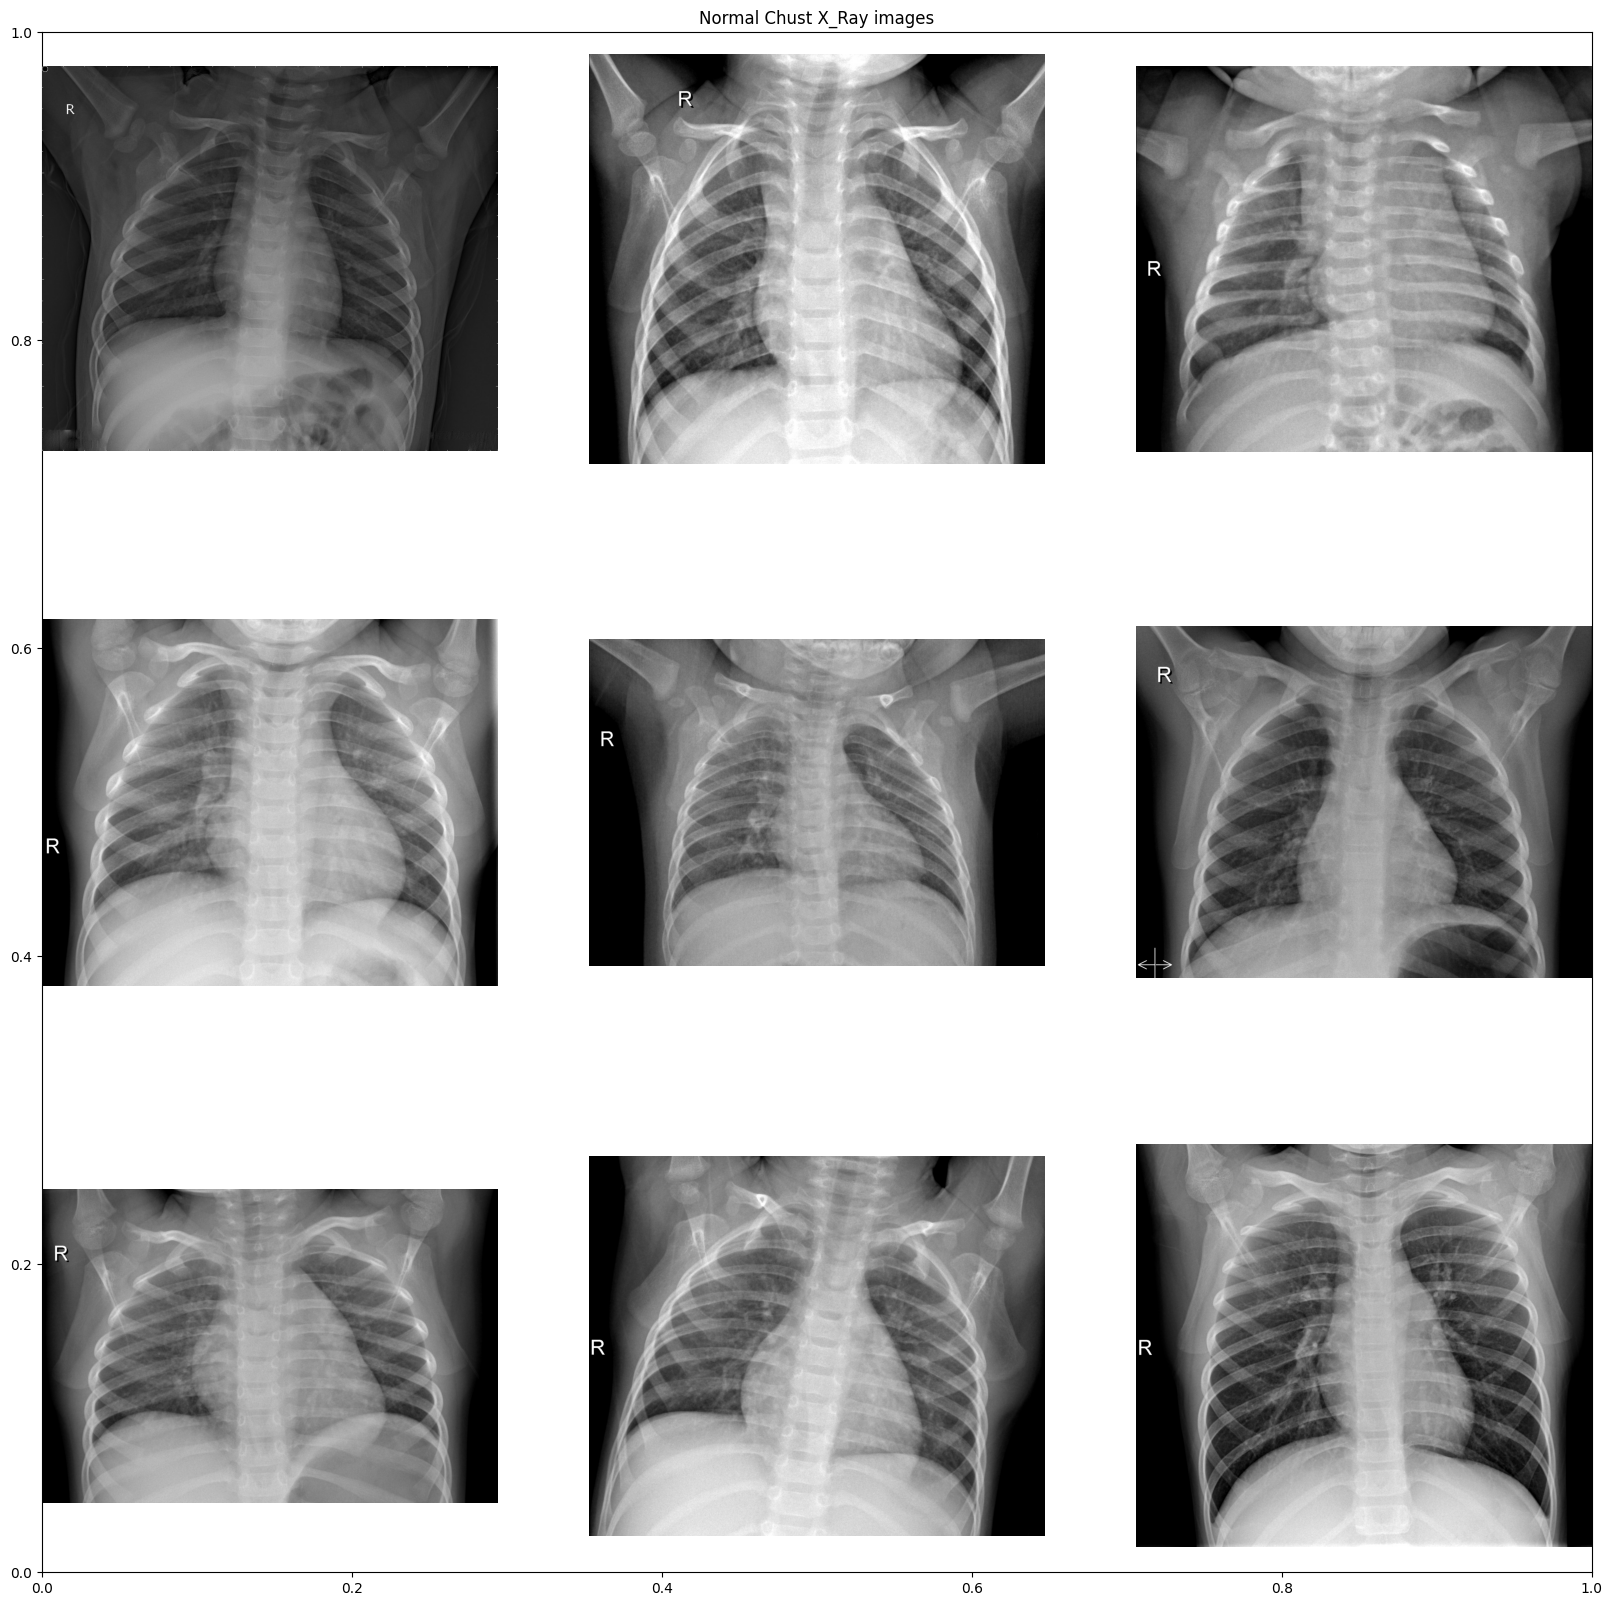

In [ ]:
# 10 normal images
plt.figure(figsize=(20, 20))
plt.title("Normal Chust X_Ray images")
loop1 = 1
for path in X_train[:9]:
    img = cv2.imread(path)
    plt.subplot(3,3, loop1)
    loop1+=1
    plt.imshow(img)
    plt.axis('off')
plt.show()



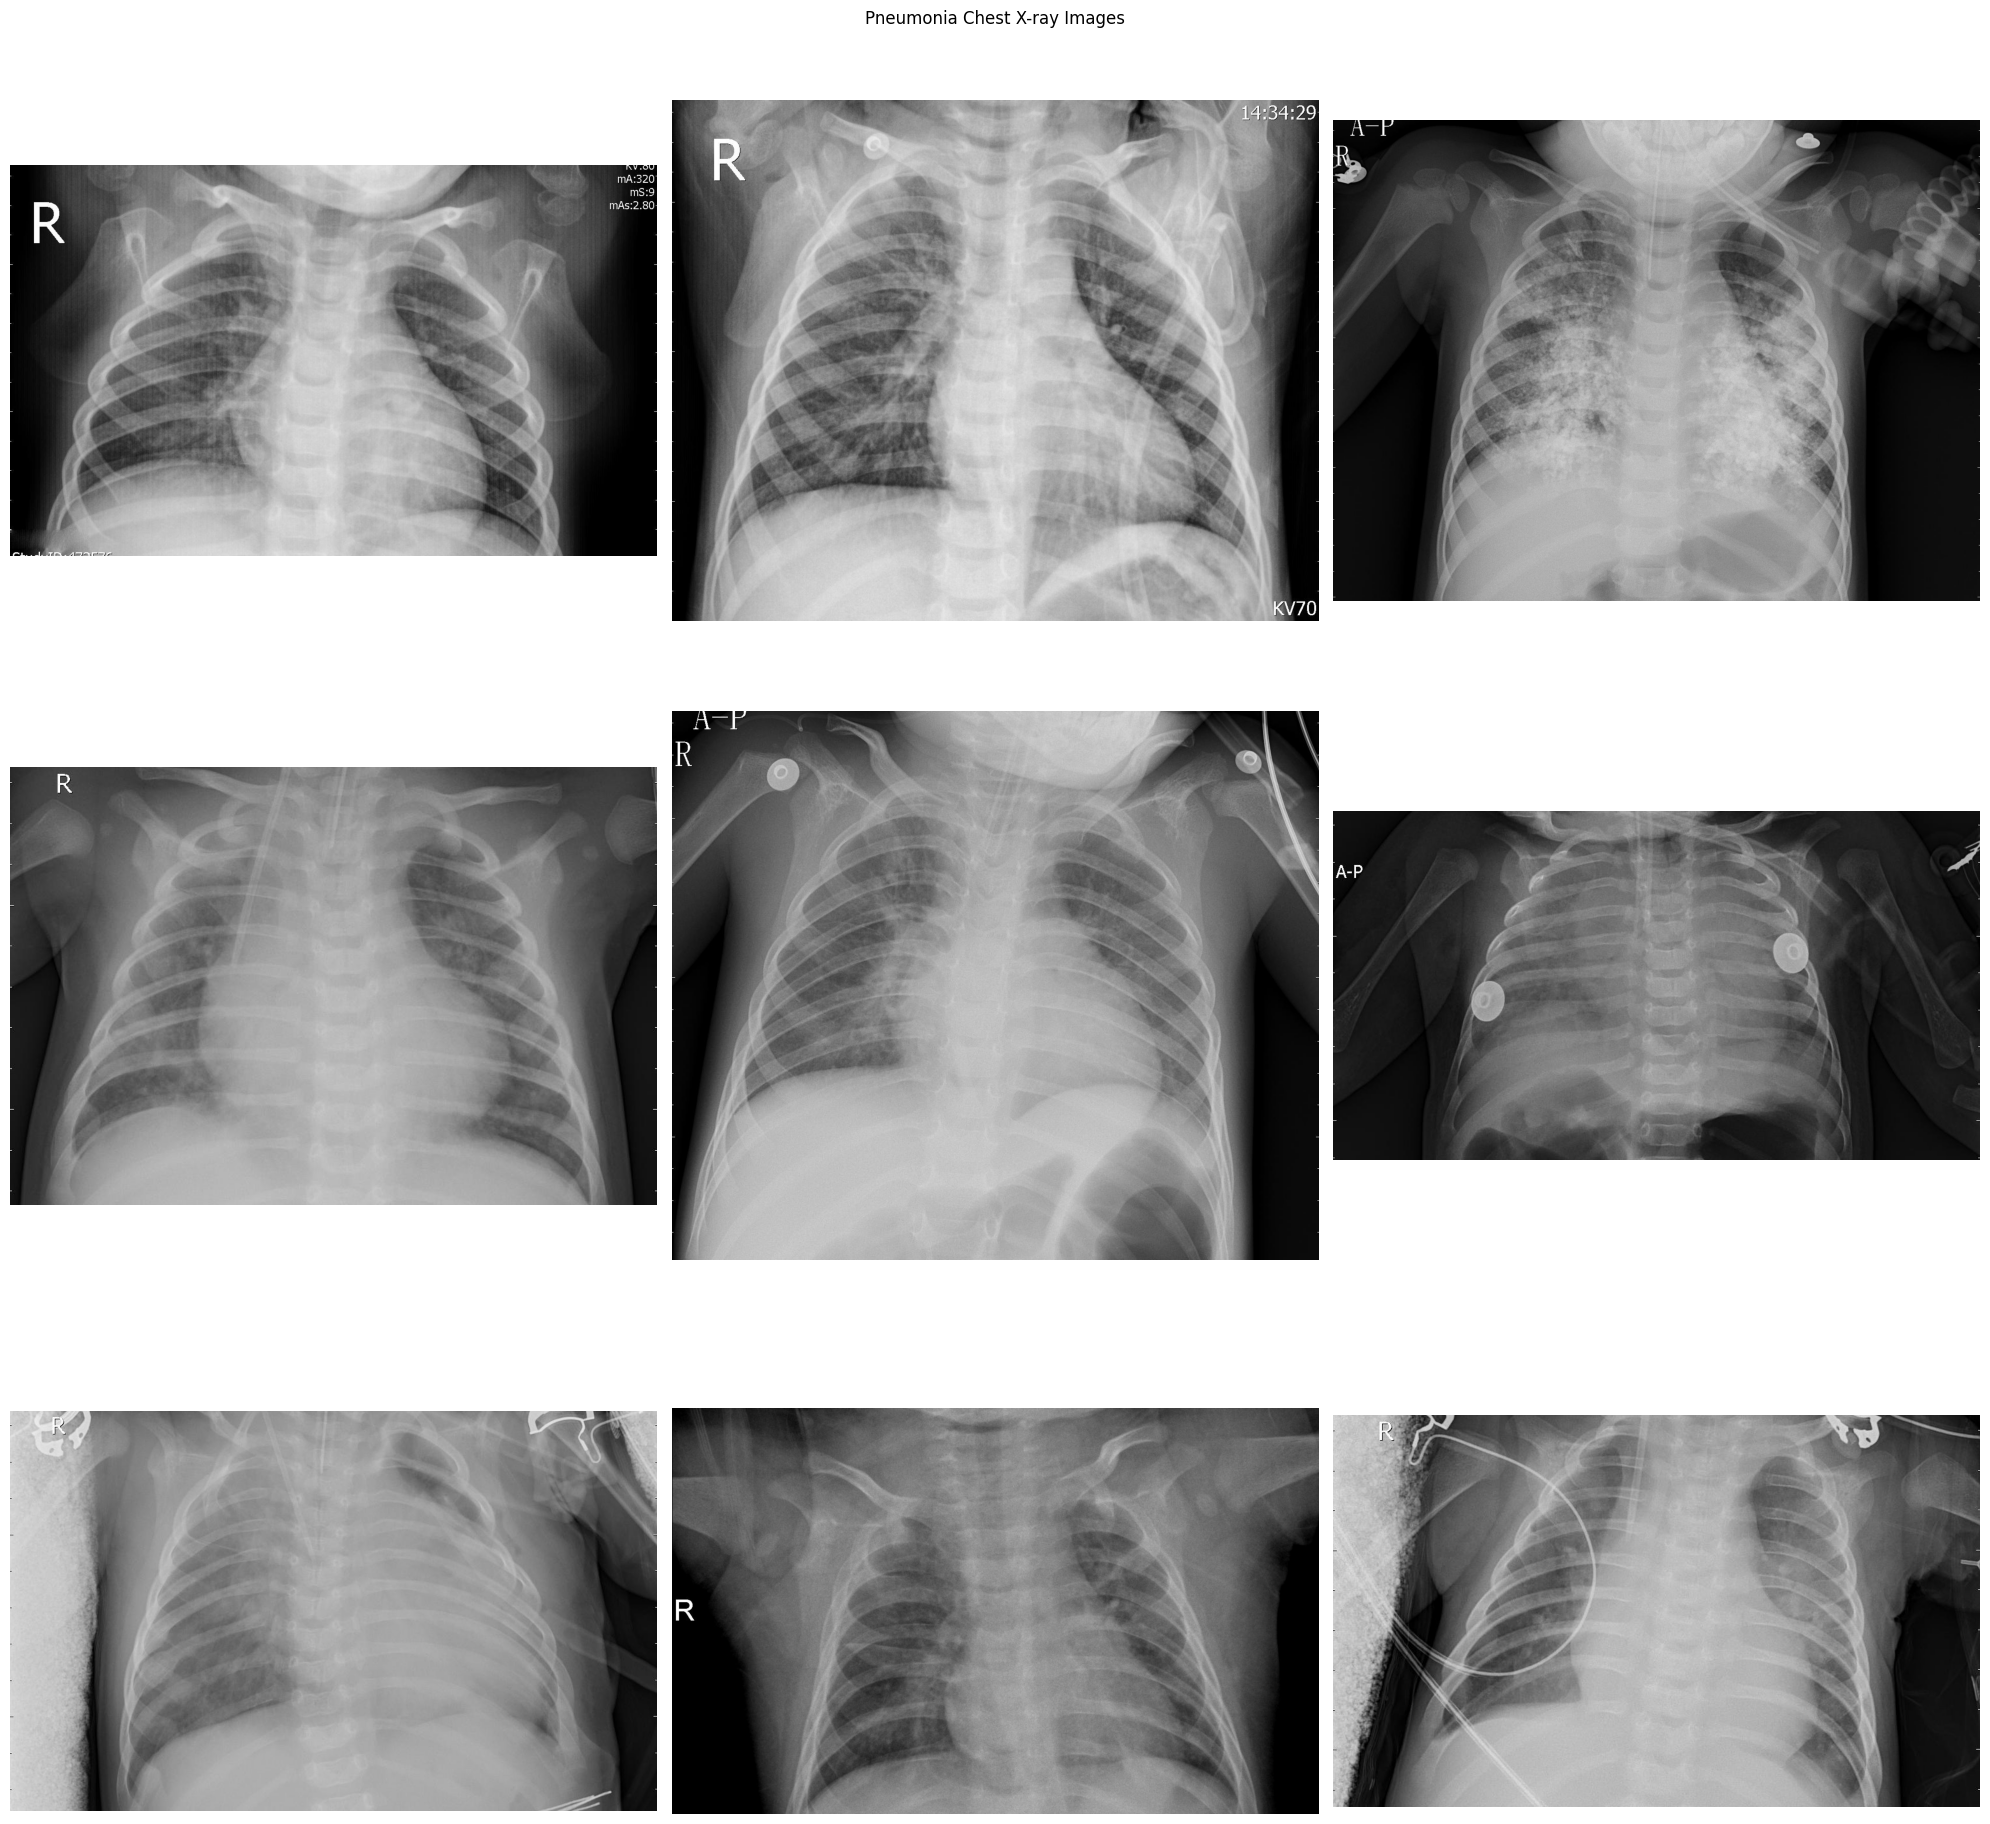

In [ ]:
import random
import cv2
import matplotlib.pyplot as plt

# Get indices of pneumonia images
pneum_indices = [i for i, label in enumerate(y_train) if label == 'pneumonia']

# Pick 10 random ones
random_indices = random.sample(pneum_indices, 9)

plt.figure(figsize=(20, 20))

for i, idx in enumerate(random_indices):
    img = cv2.imread(X_train[idx])
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    plt.subplot(3, 3, i+1)
    plt.imshow(img)
    plt.axis('off')

plt.suptitle('Pneumonia Chest X-ray Images')
plt.tight_layout()
plt.show()


# extracting processed images

In [ ]:
import cv2
import numpy as np

def process_image(image_paths, size=(64, 64)):
    processed_images = []

    for path in image_paths:
        img = cv2.imread(path)                  # Load image (BGR)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert to RGB
        img = cv2.resize(img, size)            # Resize
        img = img / 255.0                       # Normalize to [0,1]
        processed_images.append(img)

    return np.array(processed_images)
X_train_processed = process_image(X_train)
X_test_processed = process_image(X_test)


print(X_train_processed.shape)  # (num_train, 64, 64, 3)
print(X_test_processed.shape)   # (num_test, 64, 64, 3)


(5216, 64, 64, 3)
(624, 64, 64, 3)


In [ ]:
X_val_processed = process_image(X_val)

{np.int64(0): np.int64(234), np.int64(1): np.int64(390)}


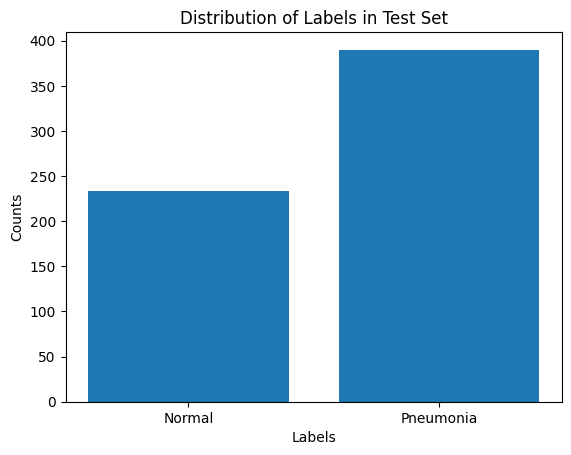

In [ ]:
from sklearn.preprocessing import LabelEncoder
import numpy as np
import matplotlib.pyplot as plt

encoder = LabelEncoder()
y_train_labeled = encoder.fit_transform(y_train)
y_test_labeled = encoder.transform(y_test)
y_val_labeled = encoder.transform(y_val)

# To count unique values in a NumPy array, use np.unique with return_counts=True
unique_labels, counts = np.unique(y_test_labeled, return_counts=True)
print(dict(zip(unique_labels, counts)))

plt.bar(unique_labels, counts)
plt.xlabel('Labels')
plt.ylabel('Counts')
plt.title('Distribution of Labels in Test Set')
plt.xticks(unique_labels, ['Normal', 'Pneumonia'])
plt.show()

In [ ]:
encoder.inverse_transform([y_test_labeled[10]])

array(['normal'], dtype='<U9')

In [ ]:
unique_labels, count = np.unique(y_test_labeled, return_counts=True)

print(unique_labels[0] , '->', encoder.inverse_transform([unique_labels[0]])[0], '-> Counts: ', counts[0])
print(unique_labels[1] , '->', encoder.inverse_transform([unique_labels[1]])[0], '-> Counts: ', counts[1])

0 -> normal -> Counts:  234
1 -> pneumonia -> Counts:  390


# Building the model

In [ ]:
X_train_processed.shape

(5216, 64, 64, 3)

In [ ]:
import tensorflow as tf
import keras
from tensorflow.keras import layers, Sequential
from tensorflow.keras import callbacks
from tensorflow.keras import optimizers
from tensorflow.keras import regularizers

In [ ]:
# X_train_processed.shape = (5216, 64, 64, 3)

chest_disease_model = Sequential([
    layers.Flatten(input_shape=(64, 64, 3)),
    layers.Dense(500, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    layers.Dense(320, activation='relu'),
    layers.Dense(100, activation='relu',),
    layers.Dense(32, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    layers.Dense(1, activation='sigmoid') # binary output

])

chest_disease_model.compile(
    optimizer = optimizers.Adam(learning_rate=0.01),
    loss = 'binary_crossentropy',
    metrics = ['accuracy']
)


early_stoping = callbacks.EarlyStopping(
    monitor='val_loss',
    patience=4,
    verbose=1
)
lr_reduce = callbacks.ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.3,
    patience=4

)



History_1 = chest_disease_model.fit(
    X_train_processed, y_train_labeled,
    shuffle=True,
    validation_data=(X_val_processed, y_val_labeled),
    batch_size=64,
    epochs=30,
    callbacks=[early_stoping, lr_reduce]
)

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/30
82/82 ━━━━━━━━━━━━━━━━━━━━ 14s 135ms/step - accuracy: 0.6737 - loss: 30.4898 - val_accuracy: 0.5000 - val_loss: 2.3416 - learning_rate: 0.0100
Epoch 2/30
82/82 ━━━━━━━━━━━━━━━━━━━━ 9s 112ms/step - accuracy: 0.7190 - loss: 2.1261 - val_accuracy: 0.5000 - val_loss: 1.7560 - learning_rate: 0.0100
Epoch 3/30
82/82 ━━━━━━━━━━━━━━━━━━━━ 8s 102ms/step - accuracy: 0.7566 - loss: 1.4147 - val_accuracy: 0.5000 - val_loss: 2.5151 - learning_rate: 0.0100
Epoch 4/30
82/82 ━━━━━━━━━━━━━━━━━━━━ 9s 111ms/step - accuracy: 0.7614 - loss: 1.4104 - val_accuracy: 0.5000 - val_loss: 1.2153 - learning_rate: 0.0100
Epoch 5/30
82/82 ━━━━━━━━━━━━━━━━━━━━ 10s 111ms/step - accuracy: 0.7599 - loss: 1.0200 - val_accuracy: 0.5000 - val_loss: 1.4317 - learning_rate: 0.0100
Epoch 6/30
82/82 ━━━━━━━━━━━━━━━━━━━━ 9s 109ms/step - accuracy: 0.7504 - loss: 1.0635 - val_accuracy: 0.5000 - val_loss: 1.0570 - learning_rate: 0.0100
Epoch 7/30
82/82 ━━━━━━━━━━━━━━━━━━━━ 9s 103ms/step - accuracy: 0.7276 - loss: 1.0753

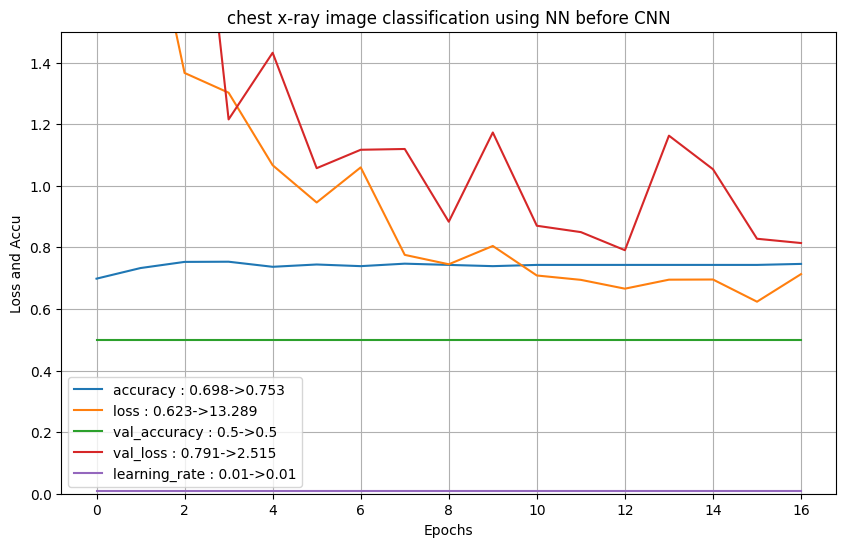

In [ ]:


def plot_history(history):
    plt.figure(figsize=(10, 6))
    for key, value in history.history.items():
        plot_lable = f'{key} : {round(min(value), 3)}->{round(max(value), 3)}'
        plt.plot(value, label =plot_lable)
    plt.title('chest x-ray image classification using NN before CNN')
    plt.xlabel('Epochs')
    plt.ylabel('Loss and Accu')
    plt.ylim(0,1.5)
    plt.legend()
    plt.grid(True)
    plt.show()

plot_history(History_1)

# Very hard to train images of 12,000 (64 * 64 * 3) pixes feature oncewithout using CNN


## simple test using CNN, to observe the diference

In [ ]:

from tensorflow.keras import layers, models, optimizers

chest_disease_model_cnn = Sequential([
    # 1. Convolutional layers "see" the patterns in 2D space
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Flatten(),

    # 3. Dense layers for final decision making
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5), # Increased dropout for better stability
    layers.Dense(1, activation='sigmoid')
])

# Keep your current optimizer and callbacks—they are actually set up perfectly!
chest_disease_model_cnn.compile(
    optimizer = optimizers.Adam(learning_rate=0.0001),
    loss = 'binary_crossentropy',
    metrics = ['accuracy']
)


History = chest_disease_model_cnn.fit(
    X_train_processed, y_train_labeled,
    shuffle=True,
    validation_data=(X_val_processed, y_val_labeled),
    batch_size=32,
    epochs=30,
    # callbacks=[early_stoping, lr_reduce]
)

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/30
163/163 ━━━━━━━━━━━━━━━━━━━━ 39s 212ms/step - accuracy: 0.7383 - loss: 0.5827 - val_accuracy: 0.6250 - val_loss: 0.6545
Epoch 2/30
163/163 ━━━━━━━━━━━━━━━━━━━━ 34s 207ms/step - accuracy: 0.8727 - loss: 0.3222 - val_accuracy: 0.8125 - val_loss: 0.4858
Epoch 3/30
163/163 ━━━━━━━━━━━━━━━━━━━━ 39s 198ms/step - accuracy: 0.9236 - loss: 0.1946 - val_accuracy: 0.6875 - val_loss: 0.5826
Epoch 4/30
163/163 ━━━━━━━━━━━━━━━━━━━━ 41s 198ms/step - accuracy: 0.9437 - loss: 0.1514 - val_accuracy: 0.6875 - val_loss: 0.6414
Epoch 5/30
163/163 ━━━━━━━━━━━━━━━━━━━━ 44s 215ms/step - accuracy: 0.9514 - loss: 0.1437 - val_accuracy: 0.6875 - val_loss: 0.7429
Epoch 6/30
163/163 ━━━━━━━━━━━━━━━━━━━━ 52s 282ms/step - accuracy: 0.9609 - loss: 0.1121 - val_accuracy: 0.8750 - val_loss: 0.3595
Epoch 7/30
163/163 ━━━━━━━━━━━━━━━━━━━━ 68s 195ms/step - accuracy: 0.9582 - loss: 0.1132 - val_accuracy: 0.8125 - val_loss: 0.3619
Epoch 8/30
163/163 ━━━━━━━━━━━━━━━━━━━━ 42s 203ms/step - accuracy: 0.9642 - loss: 0

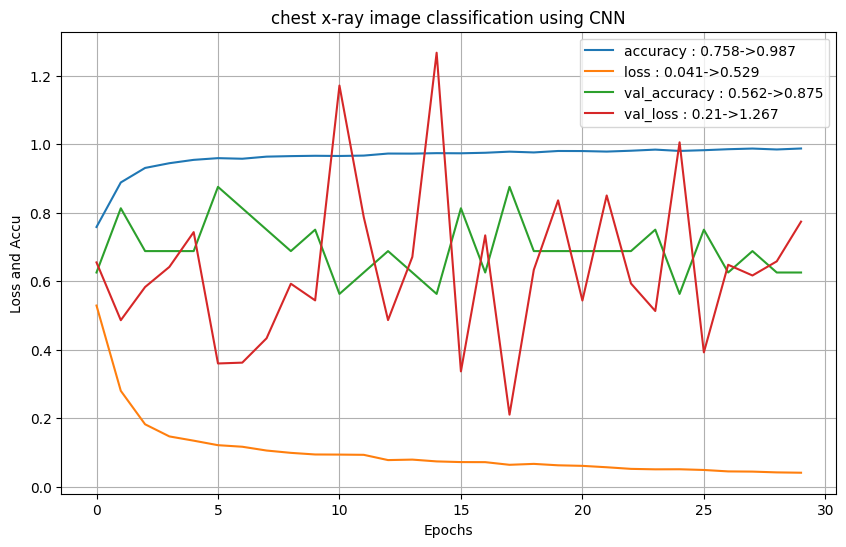

In [ ]:


def plot_history(history):
    plt.figure(figsize=(10, 6))
    for key, value in history.history.items():
        plot_lable = f'{key} : {round(min(value), 3)}->{round(max(value), 3)}'
        plt.plot(value, label =plot_lable)
    plt.title('chest x-ray image classification using CNN')
    plt.xlabel('Epochs')
    plt.ylabel('Loss and Accu')
    plt.legend()
    plt.grid(True)
    plt.show()

plot_history(History)

In [ ]:
# evalute the model
model_eval = chest_disease_model.evaluate(X_test_processed, y_test_labeled)


20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5562 - loss: 1.5122


In [ ]:
# model prediction

pred = chest_disease_model.predict(X_test_processed)
pred = np.argmax(pred, axis= 1)
print("Predicted: ", pred)
print("Actual : ", y_test_labeled)

20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step
Predicted:  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0

# Other Project

# And Other project

# **Face Emotion** Classification

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("fahadullaha/facial-emotion-recognition-dataset")

print("Path to dataset files:", path)

Using Colab cache for faster access to the 'facial-emotion-recognition-dataset' dataset.
Path to dataset files: /kaggle/input/facial-emotion-recognition-dataset


In [ ]:
import os

os.listdir(path)
path1 = os.path.join(path, 'processed_data')
catas = os.listdir(path1)
# ['surprise', 'fear', 'angry', 'neutral', 'sad', 'disgust', 'happy']

# Initialize X and y outside the loop to collect all data
X_all = []
y_all = []

for cata in catas:
    # Correct path to the category directory
    cata_dir_path = os.path.join(path1, cata)
    for img_filename in os.listdir(cata_dir_path):
        # Correct full path to the image file
        full_img_path = os.path.join(cata_dir_path, img_filename)
        X_all.append(full_img_path)
        y_all.append(cata)

# Assign the collected data to X and y
X = X_all
y = y_all

print(len(X), len(y))

49779 49779


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
s = X_train[0]  # /kaggle/input/facial-emotion-recognition-dataset/processed_data/neutral/neutral_03451.jpg

data = cv2.imread(s)

data.shape

(96, 96, 3)

In [ ]:
import cv2
import numpy as np

def process_image(image_paths):
    processed_images = []

    for path in image_paths:
        img = cv2.imread(path)                  # (BGR)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert to RGB
        img = img / 255.0                       # Normalize to [0,1]
        processed_images.append(img)

    return np.array(processed_images)

X_train_processed = process_image(X_train)


KeyboardInterrupt: 

In [ ]:
X_test_processed = process_image(X_test)


print(X_train_processed.shape)  # (num_train, 96, 96, 3)
print(X_test_processed.shape)   # (num_test, 96, 96, 3)


In [ ]:
from sklearn.preprocessing import LabelEncoder
import numpy as np
import matplotlib.pyplot as plt

encoder = LabelEncoder()
y_train_labeled = encoder.fit_transform(y_train)
y_test_labeled = encoder.transform(y_test)


unique_labels, count = np.unique(y_test_labeled, return_counts=True)

print(unique_labels[0] , '->', encoder.inverse_transform([unique_labels[0]])[0], '-> Counts: ', counts[0])
print(unique_labels[1] , '->', encoder.inverse_transform([unique_labels[1]])[0], '-> Counts: ', counts[1])


In [ ]:
import tensorflow as tf
from tensorflow import keras

from tensorflow.keras import layers, Sequential
from tensorflow.keras import callbacks
from tensorflow.keras import optimizers
from tensorflow.keras import regularizers




In [ ]:

# sequential model

emotion_model = Sequential([
    layers.Flatten(input_shape=(96, 96, 3)),
    layers.Dense(200, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    layers.Dense(100, activation='relu'),
    layers.Dense(7, activation='softmax')
])

emotion_model.compile(
    optimizer = optimizers.Adam(learning_rate=0.01),
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

Hist = emotion_model.fit(
    X_train_processed, y_train_labeled,
    shuffle=True,
    validation_split= 0.2,
    batch_size=64,
    epochs=30

    )


In [ ]:
# Evaluate the model

emotion_model.evaluate(X_test_processed, y_test_labeled)



In [ ]:


def plot_history(history):
    plt.figure(figsize=(10, 6))
    for key, value in history.history.items():
        plot_lable = f'{key} : {round(min(value), 3)}->{round(max(value), 3)}'
        plt.plot(value, label =plot_lable)
    plt.title('Face Emotion classification using NN before CNN')
    plt.xlabel('Epochs')
    plt.ylabel('Loss and Accu')
    plt.ylim(0,1.5)
    plt.legend()
    plt.grid(True)
    plt.show()

plot_history(Hist)